In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data

data = pd.read_csv("boston_house_prices.csv")

# Creating a copy of the data

df = data.copy()

# Basic EDA 

In [3]:
# Checking the first five records

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Checking the last five records

df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
# Checking five random records

df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
119,0.14476,0.0,10.01,0,0.5470,5.731,65.2,2.7592,6,432,17.8,391.50,13.61,19.3
275,0.09604,40.0,6.41,0,0.4470,6.854,42.8,4.2673,4,254,17.6,396.90,2.98,32.0
131,1.19294,0.0,21.89,0,0.6240,6.326,97.7,2.2710,4,437,21.2,396.90,12.26,19.6
311,0.79041,0.0,9.90,0,0.5440,6.122,52.8,2.6403,4,304,18.4,396.90,5.98,22.1
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4


In [6]:
# Checking the shape of the data

df.shape

(506, 14)

In [7]:
# Checking the features

df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
# Checking the datatypes of the features

df.dtypes.sort_values()

CHAS         int64
RAD          int64
TAX          int64
CRIM       float64
ZN         float64
INDUS      float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
# Checking the metadata of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
# Checking the number of null entries in the data

print('\033[1m' + f"The total number of null values in the dataset : {df.isna().sum().sum()}\n" + '\033[0m')     

if df.isna().sum().sum() != 0:
    null_col = [col for col in df.columns if col]
    pd.DataFrame({
        "Feature" : [col for col in null_col],
        "Null_Count" : [df[col].isna().sum() for col in null_col],
        "Null_Percentage" : [str(np.round((df[col].isna().sum() / len(df)) * 100, 2)) + " %" for col in null_col],
        "Data_Type" : [df[col].dtype for col in null_col]
    }).sort_values("Null_Count", ascending = False).set_index("Feature")
else:
    pass

The total number of null values in the dataset : 0



In [11]:
# Checking the statistical summary of the dataset

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


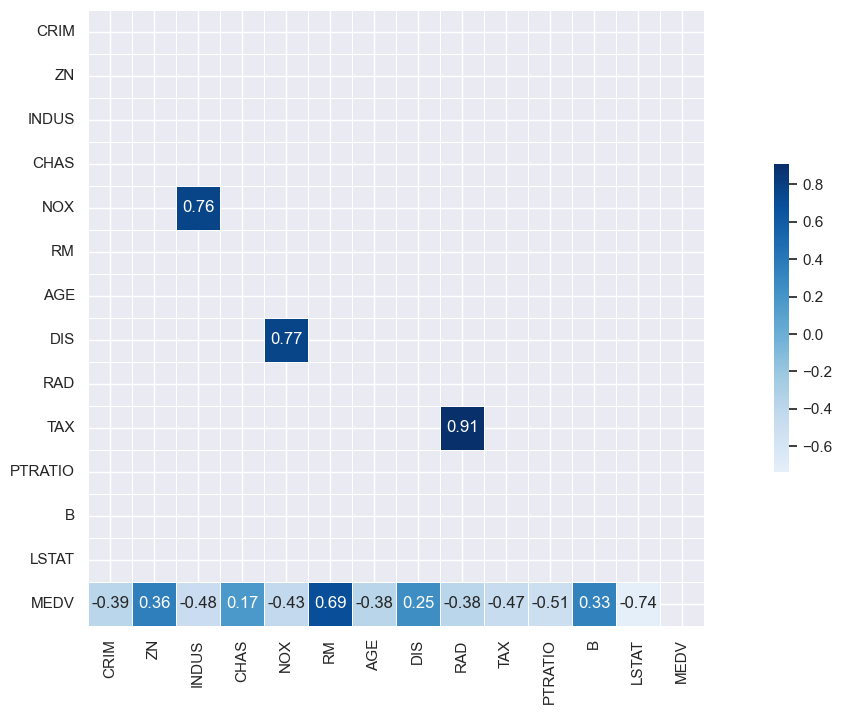

In [12]:
# Checking the correlation

def correlation(data):
    plt.figure(figsize = (18, 8))
    corr = np.round(abs(data.corr())[abs(data.corr()).iloc[:-1, :-1] > 0.75].fillna({"MEDV" : data.corr()["MEDV"]}), 3).T
    mask = np.triu(np.ones_like(corr, dtype = bool))
    sns.heatmap(corr, mask = mask, cmap = "Blues", annot = True, center = 0, square = True, linewidth = 0.5, cbar_kws = {"shrink" : 0.5})
    sns.set(style = "darkgrid")
    plt.show()
    
correlation(data)

<b>The feature "NOX" is highly correlated, so they will be dropped during pre-processing.</b>

<b>Since "RAD" is a categorical feature, we cannot calculate its correlation with numerical features.</b>

In [13]:
# Creating a function to check the count of duplicated records and drop them

def duplicate_data(data):
    
    print('\033[1m' + f"The total number of duplicate records in the dataset : {data.duplicated().sum()}" + '\033[0m')
    
    if data.duplicated().sum() != 0:
        data.drop_duplicates(inplace = True)  
    else:  
        pass
    
duplicate_data(df)

The total number of duplicate records in the dataset : 0


In [14]:
# Checking the count of unique values in each of the feature

pd.DataFrame({
    "Feature" : [col for col in df.columns],
    "Unique_Values" : [df[col].nunique() for col in df.columns],
    "Data_Type" : [df[col].dtype for col in df.columns]
}).set_index("Feature").sort_values("Unique_Values")

,Unique_Values,Data_Type
Feature,,
CHAS,2,int64
RAD,9,int64
ZN,26,float64
PTRATIO,46,float64
TAX,66,int64
INDUS,76,float64
NOX,81,float64
MEDV,229,float64
AGE,356,float64


<b>The features "CHAS" needs to be converted to categorical type durning pre-processing. </b>

In [15]:
# Checking the unique values in each of the feature

# for col in df.columns:
    
#     print('\033[1m' + f"The {col} features consists of {df[col].nunique()} unique values, which are as follows : \n" + '\033[0m')
#     print(f"{[val for val in df[col].unique()]}\n")

In [16]:
# Checking the value count in each of the feature

# for col in df.columns:
    
#     print('\n\033[1m' + f'value counts on "{col}"' + '\033[0m\n')
#     for v, c in df[col].value_counts().items():
#         print(f"{v} : {c}")

# Pre-Processing

In [17]:
def transformation(data):
    
    # converting the "RAD" and "CHAS" feature to object type
    data["RAD"] = data["RAD"].astype("O")
    data["CHAS"] = data["CHAS"].astype("O")
    
#     # converting the "RM" feature to int type
#     data["RM"] = data["RM"].astype("int")
#     # converting the "RM" feature to categorical type
#     data["RM"] = data["RM"].astype("object")
    
    # dropping the correlated feature "NOX"
    data.drop(columns = ["NOX"], inplace = True)

    # dropping the non-significant feature "B"
    data.drop(columns = ["B"], inplace = True)
    
    # transforming the "MEDV" feature
    data["MEDV"] = data["MEDV"] * 1000
    
    # transforming the "NOX" feature
#     data["NOX"] = data["NOX"] * 100
    
transformation(df)

# Exploratory Data Analysis (EDA)

## Univariate Analysis (Numerical Features) 

In [18]:
# Creating a function to perform Univariate Analysis on Numerical Features

def univariate_eda_num(data, col):
    
    print('\033[1m' + f"\t\t\t\t\t\t\t{col}" + '\033[0m\n')

    # checking the statistical summary of the feature
    print('\033[1m' + "Statistical Summary" + '\033[0m\n')
    stat_sum = np.round(data[col].describe(), 2)
    stat_sum["skewness"] = np.round(data[col].skew(), 2)  
    
    # checking for outliers using IQR method
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outlier_count = len(list(data[col][(data[col] < lower_bound) | (data[col] > upper_bound)].values))
    stat_sum["outliers"] = outlier_count
    
    print(f"{pd.DataFrame(stat_sum)}\n")
    
    # checking the distribution and outliers by plotting graphs
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
    sns.histplot(x = data[col], color = "darkblue", ax = axes[0], kde = True)
    sns.boxplot(x = data[col], color = "blue", ax = axes[1], flierprops = {"markerfacecolor" : "blue", "markeredgecolor" : "darkblue"})
    plt.tight_layout()

							MEDV

Statistical Summary

              MEDV
count       506.00
mean      22532.81
std        9197.10
min        5000.00
25%       17025.00
50%       21200.00
75%       25000.00
max       50000.00
skewness      1.11
outliers     40.00



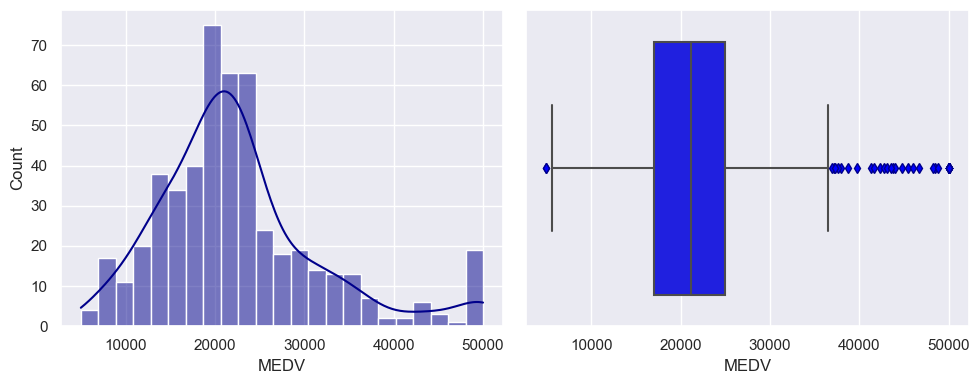

In [19]:
# Exploring the "MEDV" feature

univariate_eda_num(df, "MEDV")

<b>Insights</b>

* The average median house value in Boston is worth about \$22,532.81.
* The "MEDV" feature has a positively skewed distribution, with most of the outliers on the right side and few on the left side.
* There is a heavy concentration of house prices on the left side of distribution, indicating that 75% of the houses have a median house value below $25,000.

							TAX

Statistical Summary

             TAX
count     506.00
mean      408.24
std       168.54
min       187.00
25%       279.00
50%       330.00
75%       666.00
max       711.00
skewness    0.67
outliers    0.00



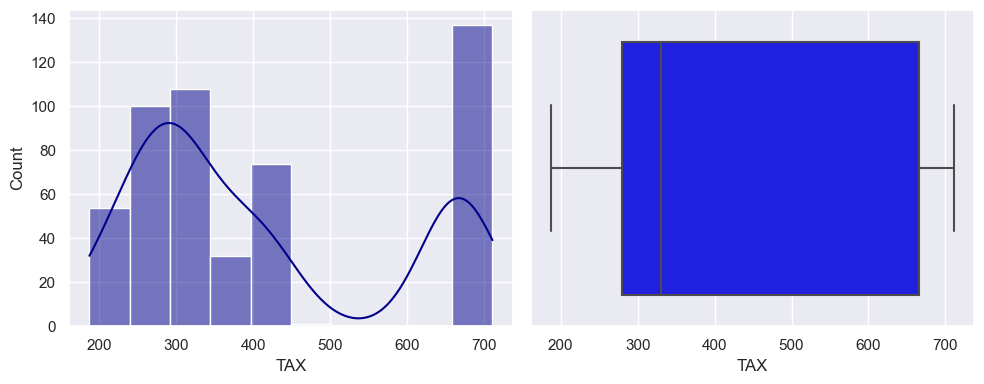

In [20]:
# Exploring the "TAX" feature

univariate_eda_num(df, "TAX")

<b>Insights</b>

* The average tax rate in Boston is \$408.24.
* The "TAX" feature has a positively skewed distribution, but there are no outliers according to the IQR method.
* There is a heavy concentration of tax rates on the left side of the distribution, indicating that 75% of the houses have a tax rate below $666.

							CRIM

Statistical Summary

            CRIM
count     506.00
mean        3.61
std         8.60
min         0.01
25%         0.08
50%         0.26
75%         3.68
max        88.98
skewness    5.22
outliers   66.00



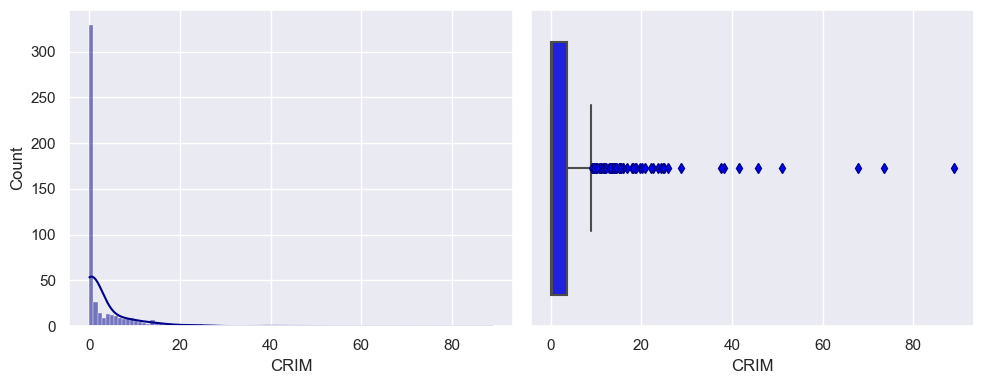

In [21]:
# Exploring the "CRIM" feature

univariate_eda_num(df, "CRIM")

<b>Insights</b>

* The average crime rate in Boston is 3.61, which indicates a lower per capita crime rate, suggesting a safer environment.
* The "CRIM" feature has a skewness value of 5.22, which indicates that it is highly positively skewed, with most of the outliers on the right side.

							ZN

Statistical Summary

              ZN
count     506.00
mean       11.36
std        23.32
min         0.00
25%         0.00
50%         0.00
75%        12.50
max       100.00
skewness    2.23
outliers   68.00



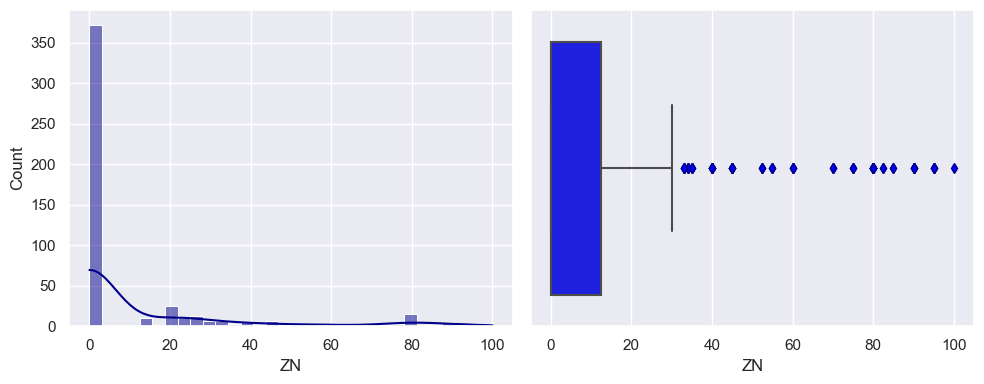

In [22]:
# Exploring the feature "ZN"

univariate_eda_num(df, "ZN")

<b>Insights</b>

* The average residental land zoned is 11.61, this land helps in Preservation of Green Spaces, Maintaining Privacy and Exclusivity & Addressing Density and Congestion.
* The "ZN" feature has a positively skewed distribution, with most of the outliers on the right side.
* There is heavy concentration of residental land zoned on the left side, indicating that 75% of the houses have a residental land zoned below 12.50.

							AGE

Statistical Summary

             AGE
count     506.00
mean       68.57
std        28.15
min         2.90
25%        45.02
50%        77.50
75%        94.07
max       100.00
skewness   -0.60
outliers    0.00



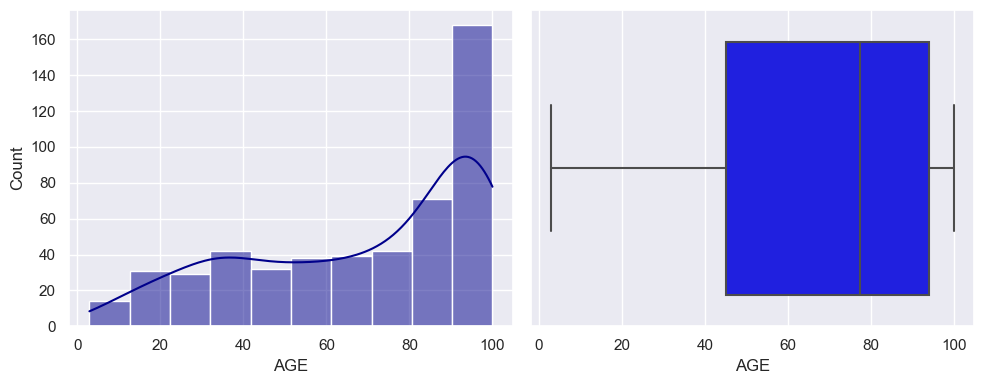

In [23]:
# Exploring the "AGE" feature

univariate_eda_num(df, "AGE")

<b>Insights</b>

* The average proportion of owner-occupied units built prior to 1940 is 68.57, indicating that the houses were built before 1940 are generally older and less expensive than homes that were built more recently.
* There are no outliers in the "AGE" feature.
* There is a heavy concentration of owner-occupied units on the right side, indicating majority of the houses were built before 1940s.

							DIS

Statistical Summary

             DIS
count     506.00
mean        3.80
std         2.11
min         1.13
25%         2.10
50%         3.21
75%         5.19
max        12.13
skewness    1.01
outliers    5.00



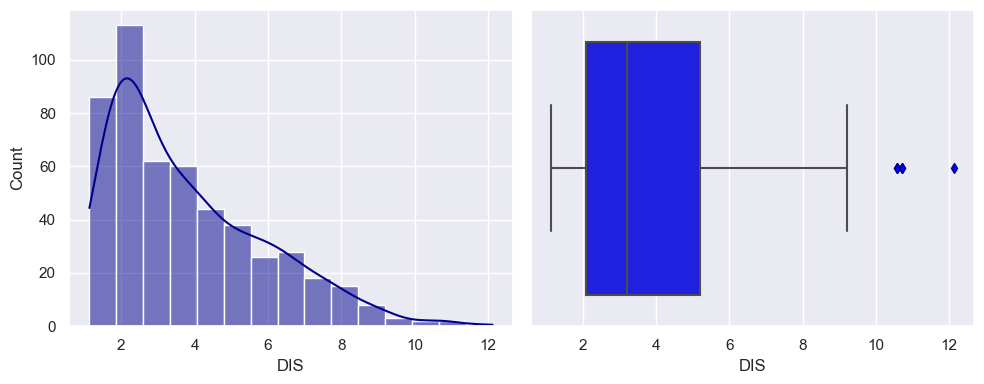

In [24]:
# Exploring the "DIS" feature

univariate_eda_num(df, "DIS")

<b>Insights</b>

* The average weighted distance between a property to employement centers is 3, indicating most of the towns are closer to employement centers.
* The "DIS" feature has a positively skewed distribution, with a few outliers on both tails.
* There is heavy concentration of weighted distance on the left side of the distribution, indicating 75% of the houses are closer to employment centers.

							PTRATIO

Statistical Summary

          PTRATIO
count      506.00
mean        18.46
std          2.16
min         12.60
25%         17.40
50%         19.05
75%         20.20
max         22.00
skewness    -0.80
outliers    15.00



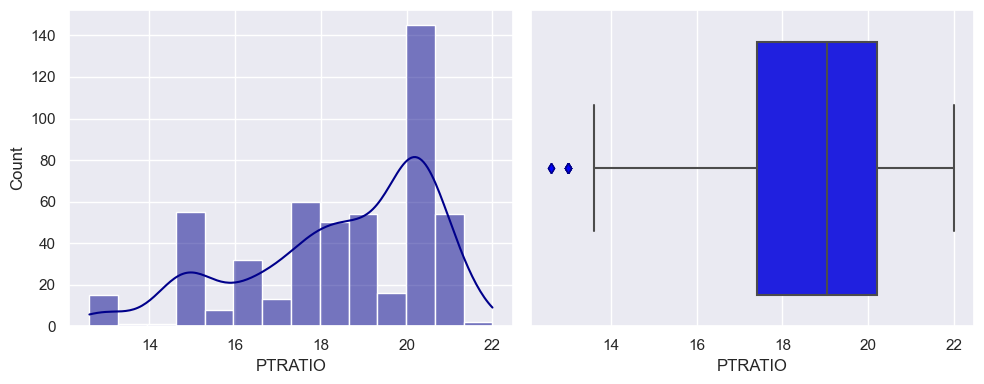

In [25]:
# Exploring the "PTRATIO" feature

univariate_eda_num(df, "PTRATIO")

<b>Insights</b>

* The average pupil-teacher ratio is 18.46, indicating that there are more teachers available to students, which can lead to smaller class sizes and more individualized attention.
* The "PTRATIO" feature has a negatively skewed distribution, with a few outliers on the left side.
* There is heavy concentration of pupil-teacher ratio on the right side of the distribution, indicating 75% of the houses have the ratio below 20 suggesting there are fewer teachers available to students, which can lead to larger class sizes and less individualized attention.

							LSTAT

Statistical Summary

           LSTAT
count     506.00
mean       12.65
std         7.14
min         1.73
25%         6.95
50%        11.36
75%        16.96
max        37.97
skewness    0.91
outliers    7.00



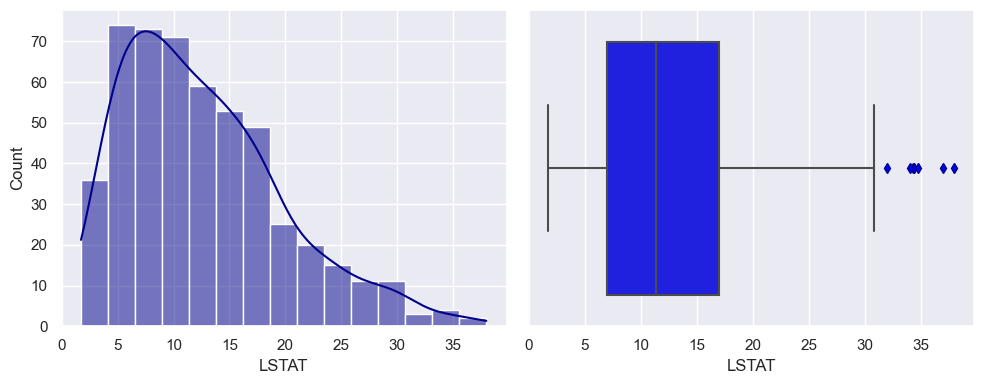

In [26]:
# Exploring the "LSTAT" feature

univariate_eda_num(df, "LSTAT")

<b>Insights</b>

* The average lower socioeconomic status is 12.65 that is more likely to live in neighborhoods with higher crime rates, lower quality schools, and less access to amenities, all of which can make housing in those neighborhoods less desirable.
* The "LSTAT" feature has a positively skewed distribution, with outliers on the right side.
* There is heavy concentration of lower socioenomic status on the left side of the distribution, indicating 75% of the houses have resident status below 16.96 suggesting lower socioenomic resident.

## Univariate Analysis (Categorical Features) 

In [27]:
# Creating a function to perform Univariate analysis on Categorical features

def univariate_eda_cat(data, col):
    
    # checking the value_counts of the feature
    d = dict(data[col].value_counts(ascending = False))
    print('\033[1m' + f'The "{col}" feature consists of {data[col].nunique()} unique values, which are as follows : ' + '\033[0m\n\n' + f"{d}")

    # plotting the distribution across categories
    sns.countplot(x = data[col], color = "darkblue")

The "CHAS" feature consists of 2 unique values, which are as follows : 

{0: 471, 1: 35}


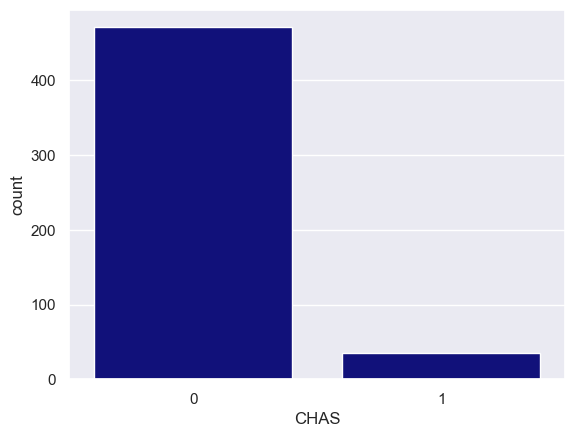

In [28]:
# Exploring the "CHAS" feature

univariate_eda_cat(df, "CHAS")

<b>Insights</b>

* Most houses in Boston do not have the Charles River as a boundary is due to higher costs associated  having a scenic view, cooler summers and milder winters.

The "RAD" feature consists of 9 unique values, which are as follows : 

{24: 132, 5: 115, 4: 110, 3: 38, 6: 26, 2: 24, 8: 24, 1: 20, 7: 17}


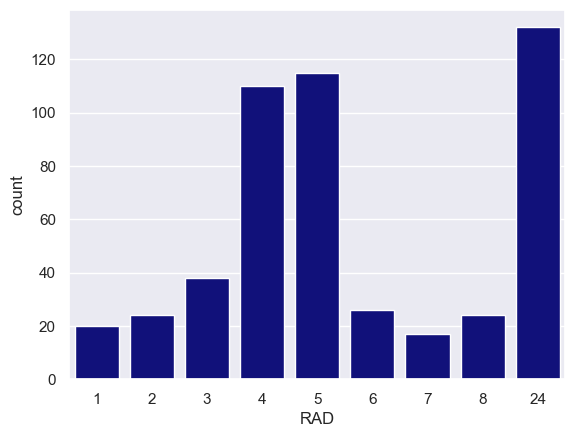

In [29]:
# Exploring the "RAD" feature

univariate_eda_cat(df, "RAD")

<b>Insights</b>

* Houses in Boston with an index value of 24 are more likely to be located closer to radial highways.

The "RM" feature consists of 446 unique values, which are as follows : 

{5.713: 3, 6.167: 3, 6.127: 3, 6.229: 3, 6.405: 3, 6.417: 3, 6.782: 2, 6.951: 2, 6.63: 2, 6.312: 2, 6.38: 2, 7.82: 2, 5.304: 2, 6.727: 2, 6.376: 2, 6.162: 2, 6.635: 2, 5.888: 2, 6.185: 2, 6.144: 2, 6.315: 2, 6.98: 2, 6.211: 2, 6.122: 2, 5.404: 2, 6.152: 2, 5.936: 2, 4.138: 2, 6.728: 2, 5.757: 2, 6.794: 2, 6.326: 2, 6.431: 2, 5.854: 2, 5.856: 2, 5.39: 2, 5.875: 2, 6.193: 2, 6.03: 2, 5.961: 2, 6.251: 2, 5.966: 2, 6.209: 2, 5.813: 2, 6.495: 2, 6.968: 2, 5.926: 2, 5.935: 2, 6.108: 2, 6.096: 2, 6.009: 2, 6.004: 2, 5.983: 2, 7.185: 2, 7.206: 1, 7.203: 1, 6.395: 1, 5.968: 1, 5.985: 1, 6.112: 1, 6.059: 1, 7.47: 1, 5.895: 1, 5.92: 1, 5.56: 1, 5.869: 1, 6.24: 1, 6.037: 1, 6.538: 1, 6.398: 1, 6.31: 1, 6.212: 1, 7.241: 1, 7.52: 1, 8.398: 1, 5.884: 1, 7.327: 1, 7.014: 1, 6.579: 1, 6.49: 1, 5.663: 1, 6.939: 1, 6.516: 1, 8.297: 1, 5.898: 1, 6.758: 1, 6.014: 1, 6.874: 1, 6.696: 1, 6.54: 1, 7.691: 1, 6.565: 1, 6.316: 1, 6.266: 1, 

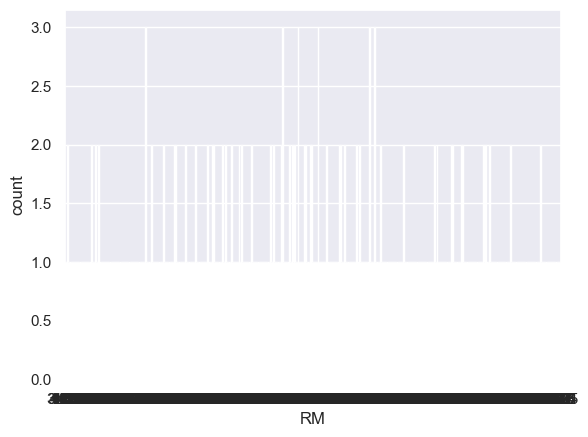

In [30]:
# Exploring the "RM" feature

univariate_eda_cat(df, "RM")

<b>Insights</b>

* The majority of houses in Boston typically comprise six rooms, followed by those with seven rooms. There are also a substantial number of houses with five rooms, while a smaller proportion have three, four, or eight rooms.

## Bivariate Analysis (Numerical vs Numerical Features) 

In [31]:
# Creating a function to perform Bivariate analysis on Numerical vs Numerical features

def bivariate_eda_nvn(data, col1, col2):
    
    # checking the correlation
    corr = np.round(data[[col1, col2]].corr().iloc[0, 1], 3)
    
    # plotting the relationship
    plt.figure(figsize = (11, 5))
    sns.regplot(x = data[col1], y = data[col2], scatter_kws = {"facecolors" : "cyan", "edgecolors" : "darkblue"}, line_kws = {"color" : "darkblue"})
    plt.title(f"{col1} vs {col2} (Correlation {corr}) ", color = "black");

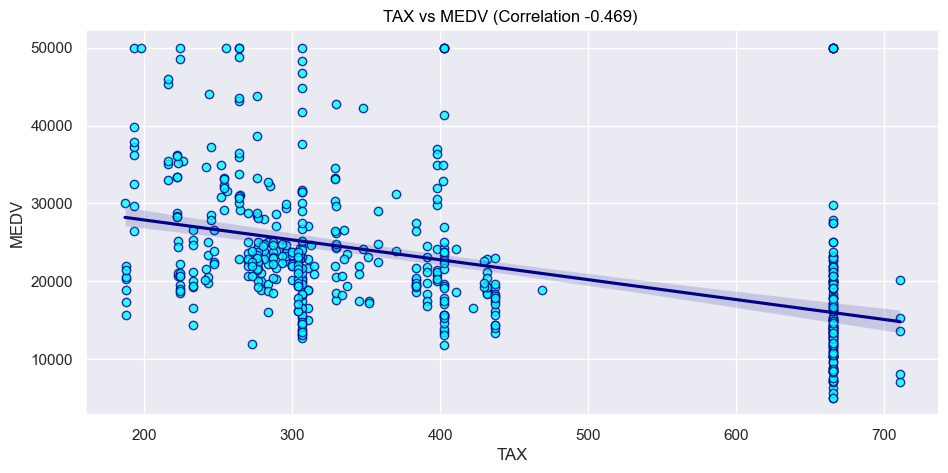

In [32]:
# Checking the relation between "TAX" and "MEDV"

bivariate_eda_nvn(df, "TAX", "MEDV")

<b>Insights</b>

* The correlation coefficient (r) of -0.469 indicates a moderate negative correlation (inverse relationship) between "TAX" and "MEDV". This means that as the tax rate increases, the price of houses tends to decrease.
* The finding that houses in high-tax areas are often sold at a lower price than those in low-tax areas is not surprising. This is because higher tax rates can make it more expensive to own a home, but the higher-tax areas may offer more local amenities or services that offset the negative impact on property prices.

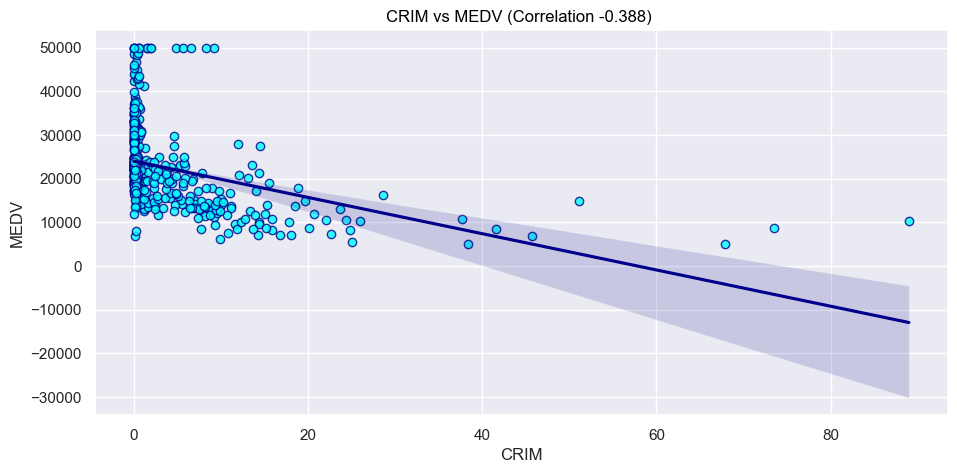

In [33]:
# Checking the relationship between "CRIM" and "MEDV"

bivariate_eda_nvn(df, "CRIM", "MEDV")

<b>Insights</b>

* The correlation coefficient (r) of -0.388 indicates a moderate negative correlation (inverse relationship) between "Crime_Rate" and "MEDV". This means that as the crime rate increases, the price of houses tends to decrease.
* People are less likely to want to live in areas with high crime rates, which can lead to a decrease in demand for housing in those areas. This can cause housing prices to go down.

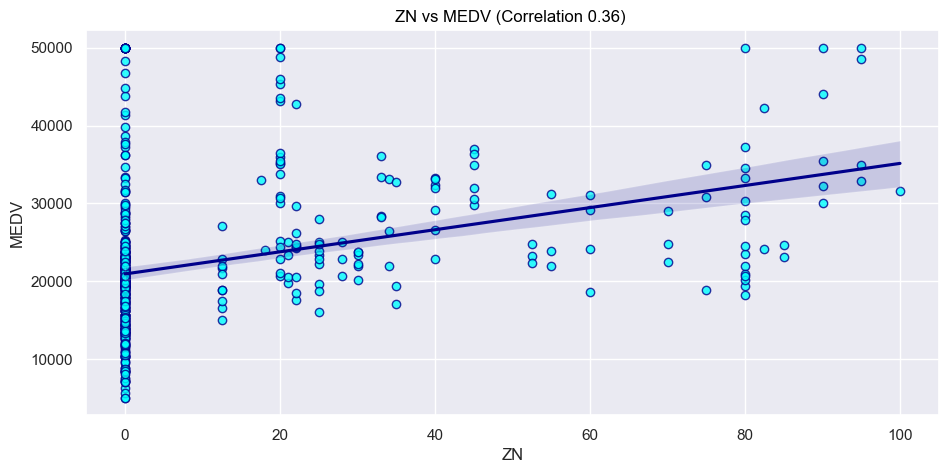

In [34]:
# Checking the relationship between "ZN" and "MEDV"

bivariate_eda_nvn(df, "ZN", "MEDV")

<b>Insights</b>

* The correlation coefficient (r) of 0.36 indicates a moderate positive correlation (direct relationship) between "ZN" and "MEDV". This means that as the proportion of residential land zoned for large single-family homes increases, the price of houses also tends to increase, but not by a significant amount.
* People's preference for spacious homes and well-maintained properties often leads them to buy houses in these areas at a higher price.

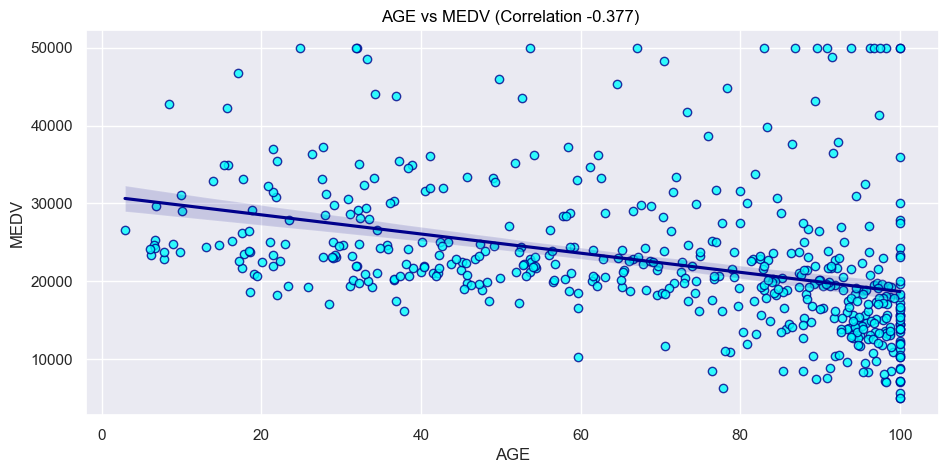

In [35]:
# Checking the relationship between "AGE" and "MEDV"

bivariate_eda_nvn(df, "AGE", "MEDV")

<b>Insights</b>

* The correlation coefficient (r) of -0.377 indicates a moderate negative correlation (inverse relationship) between "AGE" and "MEDV". This means that as the proportion of owner-occupied units built prior to 1940 increases, the price of the house tends to decrease.
* Houses built before 1940 may be less energy efficient and have more deferred maintenance than houses built after 1940. Additionally, houses built in older neighborhoods may be located in less desirable areas, such as those with high crime rates or poor schools, which can also lower their value.

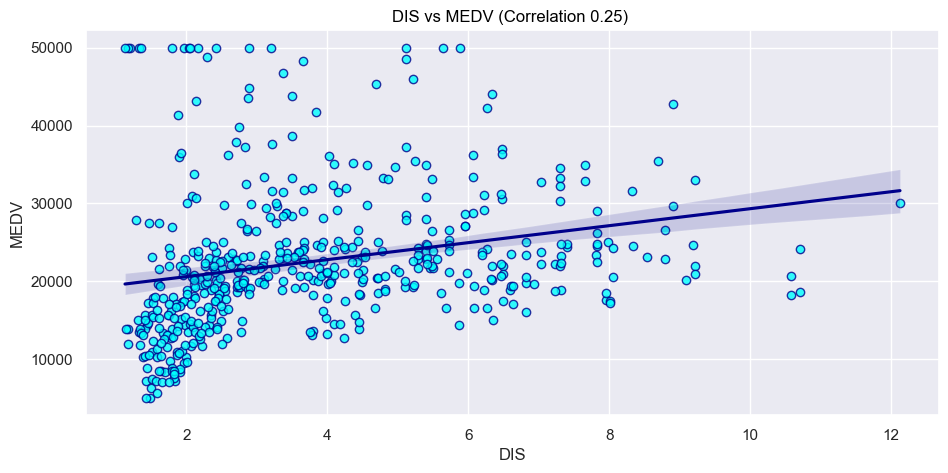

In [36]:
# Checking the relationship between "DIS" and "MEDV"

bivariate_eda_nvn(df, "DIS", "MEDV")

<b>Insights</b>

* The correlation coefficient (r) of 0.25 indicates a moderate positive correlation (direct relationship) between "DIS" and "MEDV". This means that as the distance to employment centers increases, the price of houses tends to decrease.
* Houses that are further away from employment centers are less desirable to buyers, as they may have to commute longer distances to work.

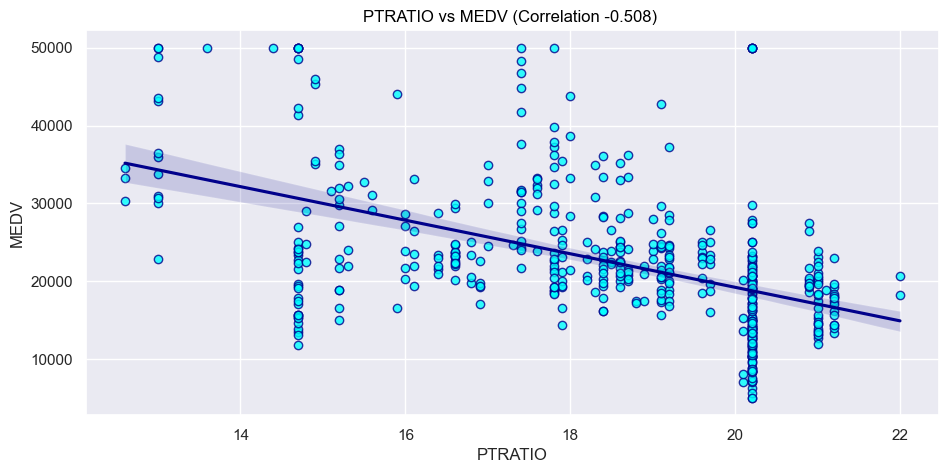

In [37]:
# Checking the relationship between "PTRATIO" and "MEDV"

bivariate_eda_nvn(df, "PTRATIO", "MEDV")

<b>Insights</b>

* The correlation coefficient (r) of -0.508 indicates a moderate negative correlation (inverse relationship) between "PTRATIO" and "MEDV". This means that as pupil-teacher ratio increases, the price of houses tends to decrease.
* Neighborhoods with better schools tend to have higher home prices. This is because people are willing to pay more for a home in a neighborhood with good schools, as they believe that their children will receive a better education.

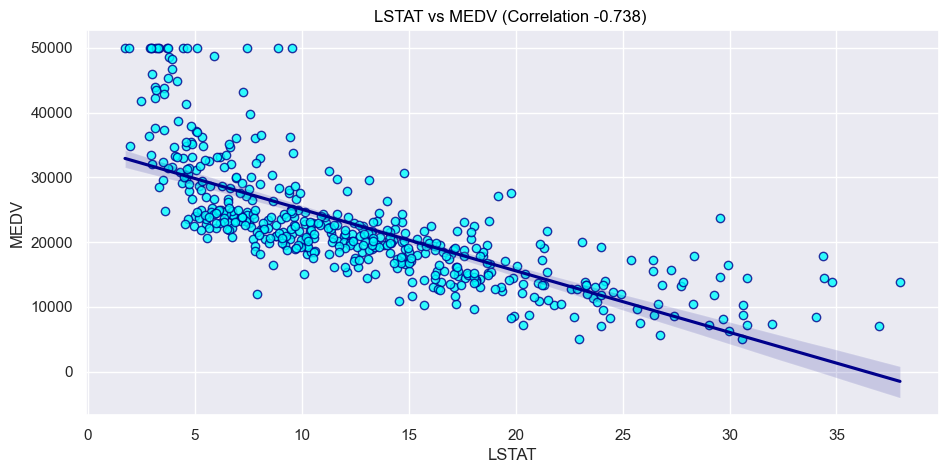

In [38]:
# Checking the relationship between "B" and "MEDV"

bivariate_eda_nvn(df, "LSTAT", "MEDV")

<b>Insights</b>

* The correlation coefficient (r) of -0.738 indicates a moderate negative correlation (inverse relationship) between "LSTAT" and "MEDV". This means that as the value of lower-socioenomic status increases, the price of houses decreases. In other words, houses in areas with a lower socioeconomic status tend to be less expensive.
* People of lower socioeconomic status often have lower incomes, which means that they have less money to spend on housing.

## Bivariate Analysis (Numerical vs Categorical Features) 

In [39]:
# Creating a function to perform Bivariate analysis on Numerical vs Categorical features

def bivariate_eda_nvc(data, col1, col2):
    
    # checking the distribution across different categories
    print('\033[1m' + f"Distribution of {col2} across different categories of the {col1} feature\n" + '\033[0m')
    print(np.round(data.groupby(col1)[col2].mean(), 2))
    sns.barplot(x = data.groupby(col1)[col2].mean().index, y = data.groupby(col1)[col2].mean().values, color = "darkblue")

Distribution of MEDV across different categories of the CHAS feature

CHAS
0    22093.84
1    28440.00
Name: MEDV, dtype: float64


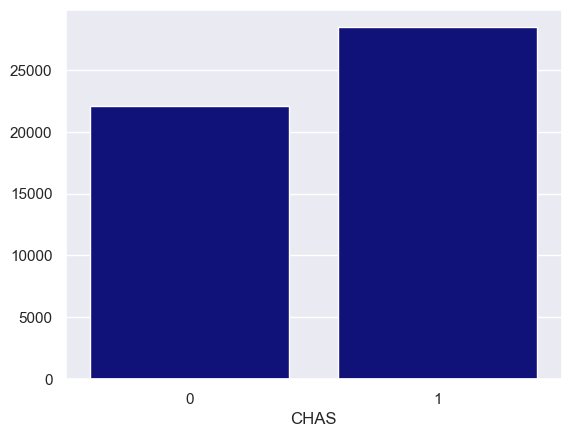

In [40]:
# Checking the distribution between "CHAS" and "MEDV"

bivariate_eda_nvc(df, "CHAS", "MEDV")

<b>Insights</b>

* Houses located near the Charles River have a higher price of 28,440 as they are associated having a scenic view, cooler summers and milder winters, compared to houses that are not situated near the river, which have a price of 22,093. 

Distribution of MEDV across different categories of the RAD feature

RAD
1     24365.00
2     26833.33
3     27928.95
4     21387.27
5     25706.96
6     20976.92
7     27105.88
8     30358.33
24    16403.79
Name: MEDV, dtype: float64


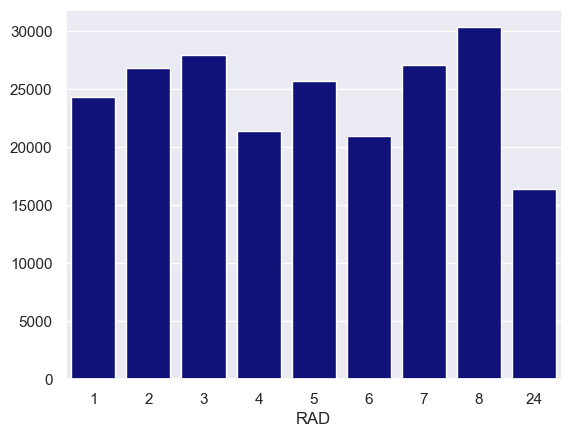

In [41]:
# Checking the distribution between "RAD" and "MEDV"

bivariate_eda_nvc(df, "RAD", "MEDV")

<b>Insights</b>

* Houses possessing a RAD score of 8 exhibit a higher price by $30,358, followed closely by properties with RAD scores of 3 and 7.

# Feature Transformation 

## Outlier Treatment

							    CRIM

						Before & After Outlier Treatment


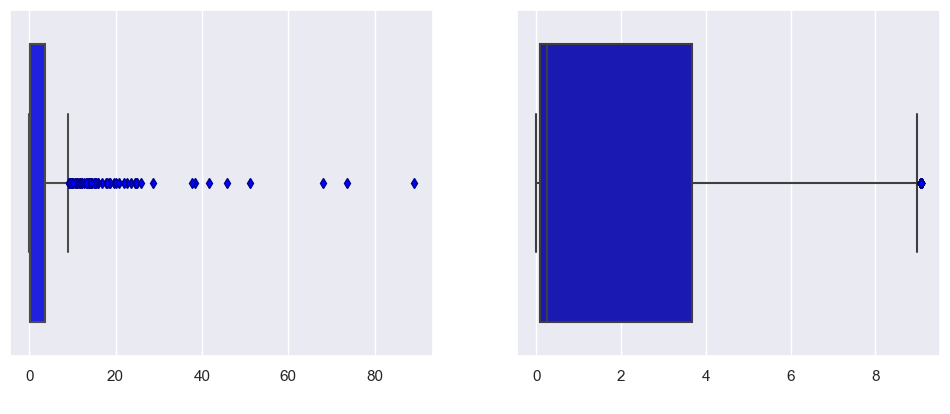

							    ZN

						Before & After Outlier Treatment


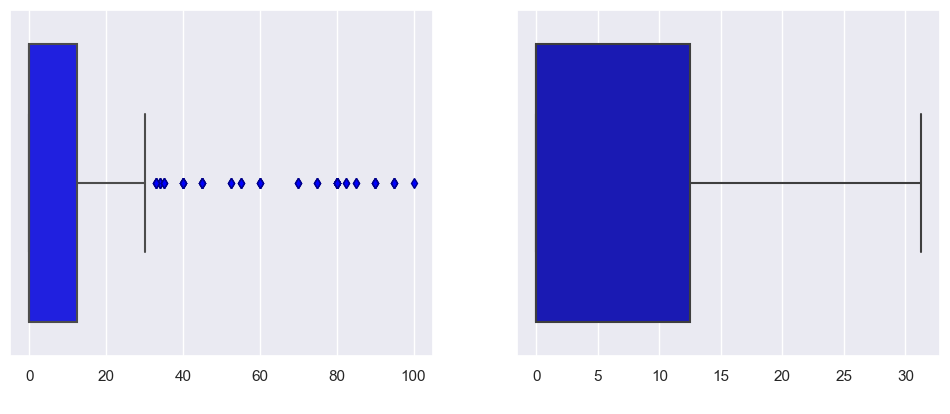

							    RM

						Before & After Outlier Treatment


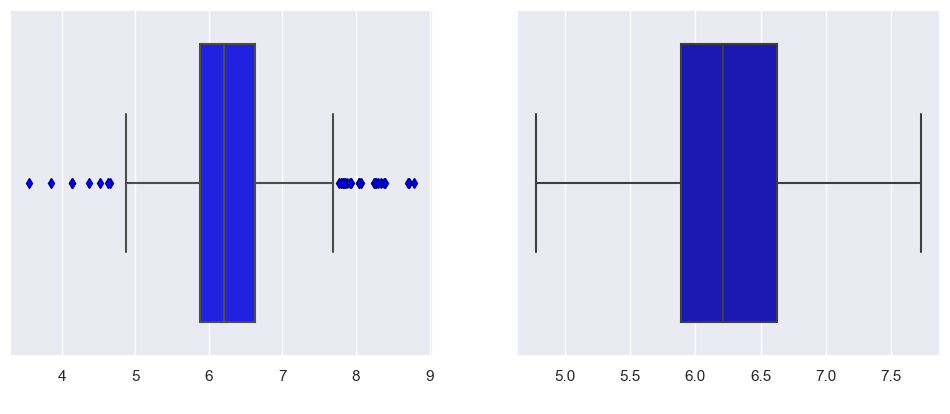

							    DIS

						Before & After Outlier Treatment


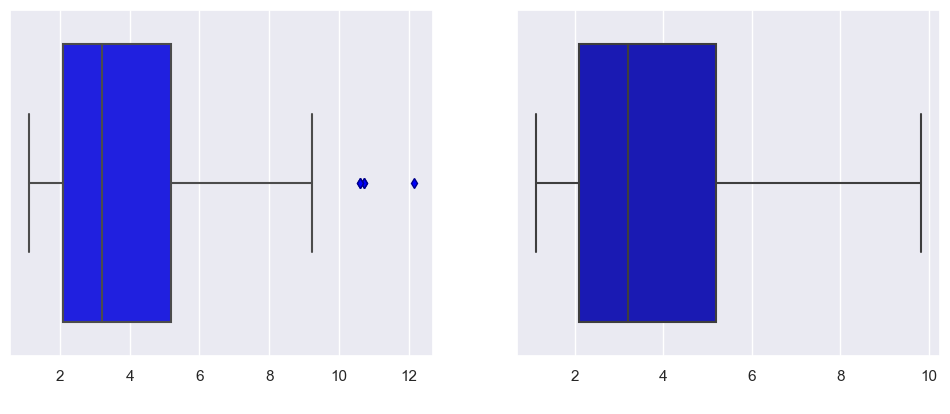

							    PTRATIO

						Before & After Outlier Treatment


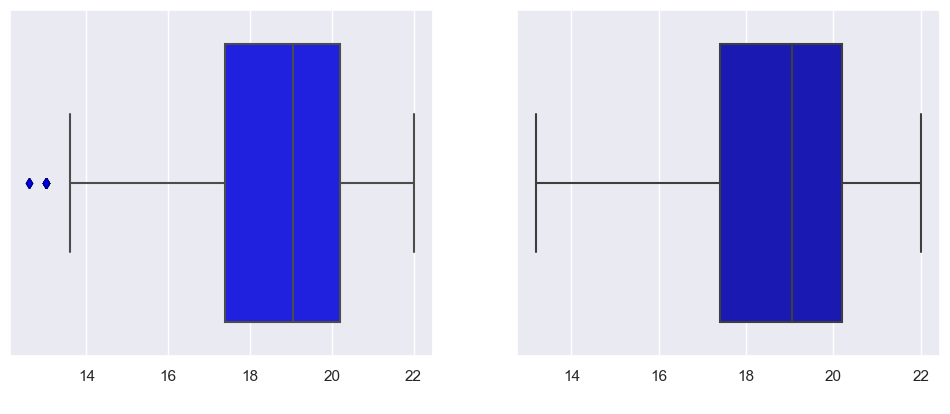

							    LSTAT

						Before & After Outlier Treatment


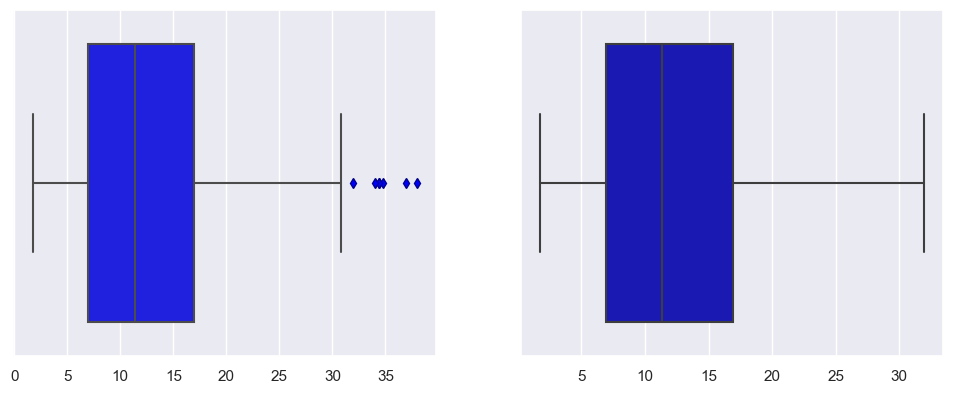

In [42]:
# Creating a function to handle the Outliers

def outlier_treatment(data):
    
    for col in data.select_dtypes(exclude = ["O"]).columns[:-1]:
    # calculating the lower and upper bound
        Q1, Q3 = data[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        outlier_count = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])

        # checking for outliers
        if outlier_count != 0:
            print('\033[1m' + f"\t\t\t\t\t\t\t    {col}\n\n\t\t\t\t\t\tBefore & After Outlier Treatment" + '\033[0m')
            fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))
            sns.boxplot(x = data[col], color = "blue", ax = axes[0], flierprops = {"markerfacecolor" : "blue", "markeredgecolor" : "darkblue"})
            data[col] = np.where(data[col] < lower_bound, np.round(lower_bound, 2), np.where(data[col] > upper_bound, np.round(upper_bound, 2), data[col]))
            sns.boxplot(x = data[col], color = "mediumblue", ax = axes[1], flierprops = {"markerfacecolor" : "blue", "markeredgecolor" : "darkblue"})
            axes[0].set_xlabel(" ")
            axes[1].set_xlabel(" ")
            plt.show()
        else:
            pass
        
outlier_treatment(df)

<b>Successfully, capped the Outliers. 

## Multicollinearity Check - I

In [43]:
# Creating a function to check multicollinearity

def multicollinearity_check(data, target):

    # splitting the data into dependent and independent features
    X = data.drop(columns = target)

    # applying Standardization to scale the data
    X_sc = StandardScaler().fit_transform(X)
    
    vif_features = {}
    drop_flag = True
    
    while drop_flag:
        
        vif_df = pd.DataFrame()
        vif_df["VIF"] = [np.round(variance_inflation_factor(X_sc, i), 3) for i in range(X.shape[1])]
        vif_df["Feature"] = X.columns
        max_vif_feature = vif_df.loc[vif_df['VIF'].idxmax()]
                
        if max_vif_feature['VIF'] > 5:
            X_sc = np.delete(X_sc, max_vif_feature.name, axis=1)
            X.drop(columns = max_vif_feature['Feature'], inplace = True)
            vif_features[max_vif_feature["Feature"]] = max_vif_feature["VIF"]
        else:
            drop_flag = False
            
    if len(vif_features) == 0:
        print('\033[1m' + "There is no Multicollinearity." + '\033[0m')
    else:
        print('\033[1m' + f'Features (VIF > 5)\n' + '\033[0m')
        for feature, vif in vif_features.items():
            print(f"{feature} : {vif}")

multicollinearity_check(df, "MEDV")

# Dropping the features having a high VIF

df.drop(columns = ["RAD", "TAX"], inplace = True)

Features (VIF > 5)

RAD : 12.57
TAX : 5.621


## Forward Selection

In [44]:
# Creating a function to check statistical significance of the features

def feature_significance(data, target):
    
    p_values = pd.Series(np.round(f_regression(data.drop(columns = [target]), data[target])[1], 3), data.drop(columns = [target]).columns)
    non_significant_features = p_values[p_values > 0.05].to_dict()
    
    if len(non_significant_features) != 0:
        print('\033[1m' + f'Non-significant Features (p-value > 0.05)\n' + '\033[0m')
        for col, pval in non_significant_features.items():
            if pval > 0.05:
                print(f"{col} : {pval}")
            else:
                pass
    else:
        print('\033[1m' + "All features are statistically significant." + '\033[0m')            

feature_significance(df, "MEDV")

All features are statistically significant.


In [45]:
# Creating a function to perform Encoding

# creating a copy of the data

df_model = df.copy()

def encoder(data):
    
    # applying one-hot encoding to the object features
    for col in data.select_dtypes("O").columns:
        data[col] = data[col].astype(str)
        en_df = pd.DataFrame(OneHotEncoder(sparse = False, drop = [data[col].value_counts().index[-1]], dtype = int).fit_transform(data[[col]]), columns = f"{col}_" + data[col].value_counts().index[:-1])
        data = pd.concat([data, en_df], axis = 1)
        data.drop(columns = [col], inplace = True)
        
    return data

df_model = encoder(df_model)

df_model

,CRIM,ZN,INDUS,RM,AGE,DIS,PTRATIO,LSTAT,MEDV,CHAS_0
0,0.00632,18.0,2.31,6.575,65.2,4.0900,15.3,4.98,24000.0,1
1,0.02731,0.0,7.07,6.421,78.9,4.9671,17.8,9.14,21600.0,1
2,0.02729,0.0,7.07,7.185,61.1,4.9671,17.8,4.03,34700.0,1
3,0.03237,0.0,2.18,6.998,45.8,6.0622,18.7,2.94,33400.0,1
4,0.06905,0.0,2.18,7.147,54.2,6.0622,18.7,5.33,36200.0,1
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,21.0,9.67,22400.0,1
502,0.04527,0.0,11.93,6.120,76.7,2.2875,21.0,9.08,20600.0,1
503,0.06076,0.0,11.93,6.976,91.0,2.1675,21.0,5.64,23900.0,1
504,0.10959,0.0,11.93,6.794,89.3,2.3889,21.0,6.48,22000.0,1


## Collinearity 

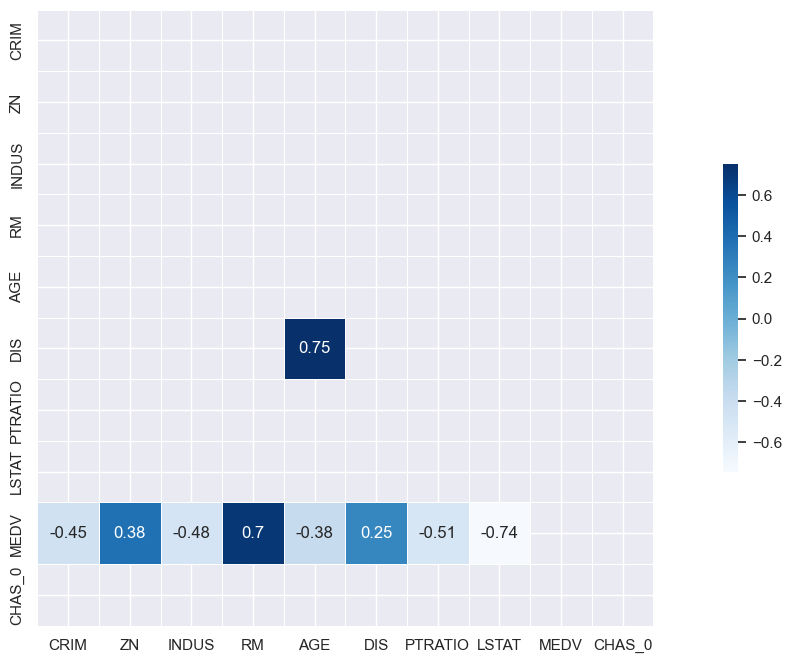

In [46]:
# Checking the correlation

correlation(df_model)

## Multicollinearity Check - II

In [47]:
# Checking for multicollinearity

multicollinearity_check(df_model, "MEDV")

There is no Multicollinearity.


## Log Transformation 

Since the "MEDV" feature is not normally distributed, there won't be a linear relationship between the dependent variables and "price", which means the Linearity assumption won't be satisfied. However, applying a log transformation to the "MEDV" feature will make it normally distributed and later take exponential to get the original predictions.


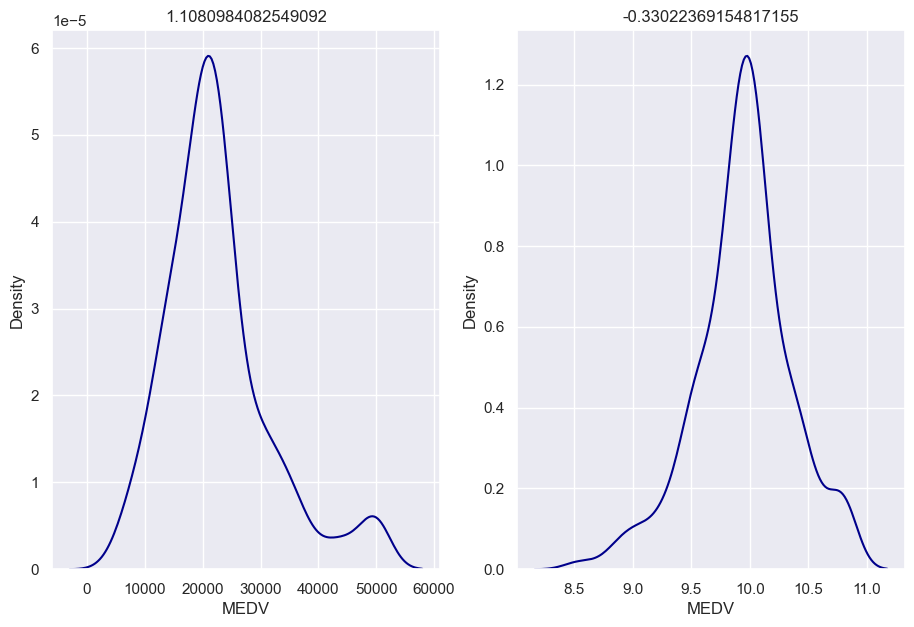

In [48]:
# Checking the distribution of the "price" feature

plt.figure(figsize = (11, 7))

plt.subplot(1, 2, 1)
sns.kdeplot(df_model["MEDV"], color = "darkblue")
plt.title(df_model["MEDV"].skew())

print('\033[1m' + 'Since the "MEDV" feature is not normally distributed, there won\'t be a linear relationship between the dependent variables and "price", which means the Linearity assumption won\'t be satisfied. However, applying a log transformation to the "MEDV" feature will make it normally distributed and later take exponential to get the original predictions.' + '\033[0m')

y_log = np.log1p(df_model["MEDV"])
plt.subplot(1, 2, 2)
sns.kdeplot(y_log, color = "darkblue")
plt.title(y_log.skew())
plt.show()

## Feature Scaling

In [49]:
# Splitting the data into dependent and independent features

X = df_model.drop(columns = "MEDV")
y = df_model["MEDV"]

# Applying standardization to scale the data

X_sc = StandardScaler().fit_transform(X)

# Model Building & Evaluation

In [50]:
def regression_model(MODEL, train, test):
    
    print('\033[1m' + f"\t\t\t\t\tModel : {MODEL}" + '\033[0m\n')
    
    model = MODEL
    
    # splitting the data for training and test
    X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 11)
    
    # creating a list to store measurements
    metrics = []
    
    # training the model
    model.fit(X_train, y_train)
    
    # making predictions on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # calculating the r2_score and adjusted_r2_score
    train_r2_score = np.round(r2_score(y_train, y_train_pred), 3)
    test_r2_score = np.round(r2_score(y_test, y_test_pred), 3)
    adj_r2_train = np.round(1 - (1 - r2_score(y_train, y_train_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] -1), 3)
    adj_r2_test = np.round(1 - (1 - r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1] -1), 3)
    metrics.extend([train_r2_score, test_r2_score, adj_r2_train, adj_r2_test])
    
    # calculating the variance to check whether the model is overfitting or underfitting
    variance = str(np.round((train_r2_score * 100) - (test_r2_score * 100), 3)) + "%"
    metrics.append(variance)
    
    print('\033[1m' + "r2 Score" + '\033[0m\n')
    print(f"r2_score_train : {train_r2_score}")
    print(f"r2_score_test : {test_r2_score}")
    print(f"Variance : {variance}")
    print(f"Adjusted_r2_score_train : {adj_r2_train}")
    print(f"Adjusted_r2_score_test : {adj_r2_test}\n")
    
    # calculating the metrics
    mse = np.round(mean_squared_error(y_test, y_test_pred), 2)
    rmse = np.round(np.sqrt(mse), 2)
    mae = np.round(mean_absolute_error(y_test, y_test_pred), 2)
    metrics.extend([mse, rmse, mae])
    print('\033[1m' + f"Model Measurements (Metrics)" + '\033[0m\n')
    print(f"MSE : {mse}\nRMSE : {rmse}\nMAE : {mae}")
    print()
    
    # plotting the actual vs predicted results
    plt.figure(figsize = (16, 7))
    sns.scatterplot(x = y_test, y = y_test_pred, color = "blue", edgecolor = "darkblue")
    sns.regplot(x = y_test, y = y_test_pred, scatter = False, color = "black", line_kws = {"color" : "black"})
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted MEDV", color = "black", size = 14)
    plt.show()
    print()
    
    # checking the normality of the residuals
    plt.figure(figsize = (16, 7))
    residuals = y_test - y_test_pred
    plt.subplot(1, 2, 1)
    sns.kdeplot(residuals, color = "darkblue")
    plt.subplot(1, 2, 2)
    stats.probplot(residuals, dist = "norm", plot = plt)
    plt.suptitle("Residuals Distribution", color = "black", size = 14)
    plt.show()
    print()
    
    # checking for homoscedasticity
    plt.figure(figsize = (16, 7))
    sns.scatterplot(x = y_test_pred, y = residuals, color = "blue")
    plt.axhline(y = 0, color = "red", linewidth = 2)
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.title("Predicted vs Residuals", color = "black", size = 14)
    print()
    
    return model, metrics

## Linear Regression

					Model : LinearRegression()

r2 Score

r2_score_train : 0.717
r2_score_test : 0.68
Variance : 3.7%
Adjusted_r2_score_train : 0.711
Adjusted_r2_score_test : 0.648

Model Measurements (Metrics)

MSE : 27486727.36
RMSE : 5242.78
MAE : 3554.02



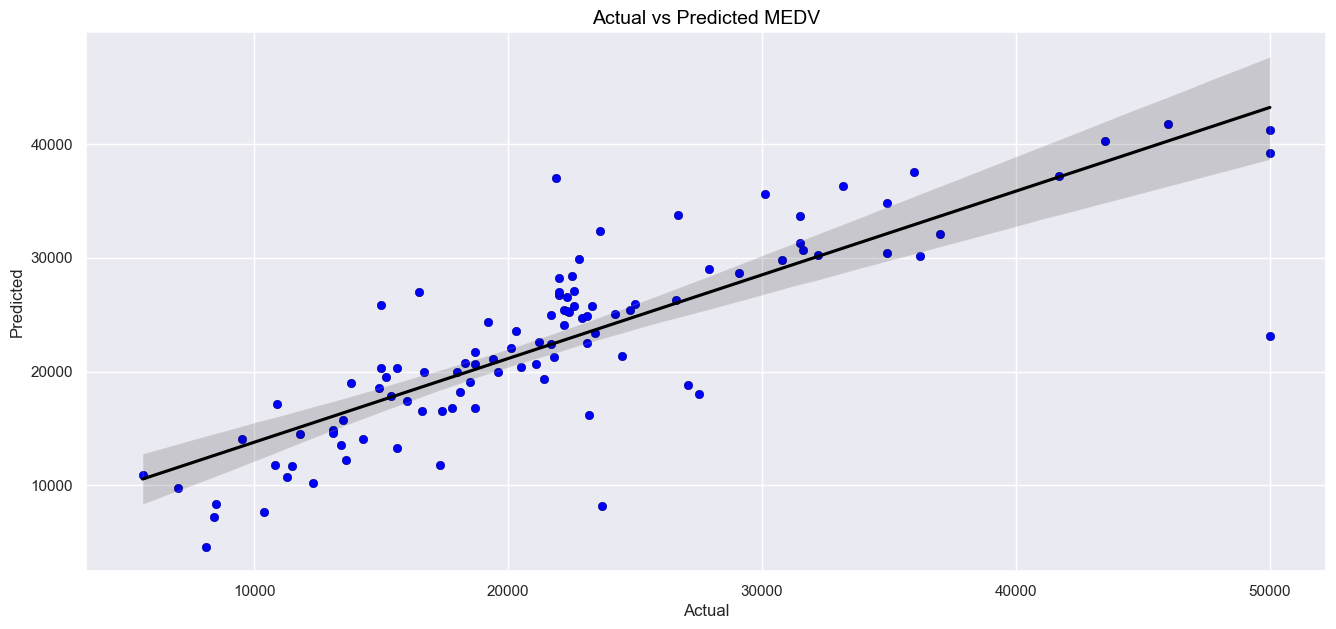

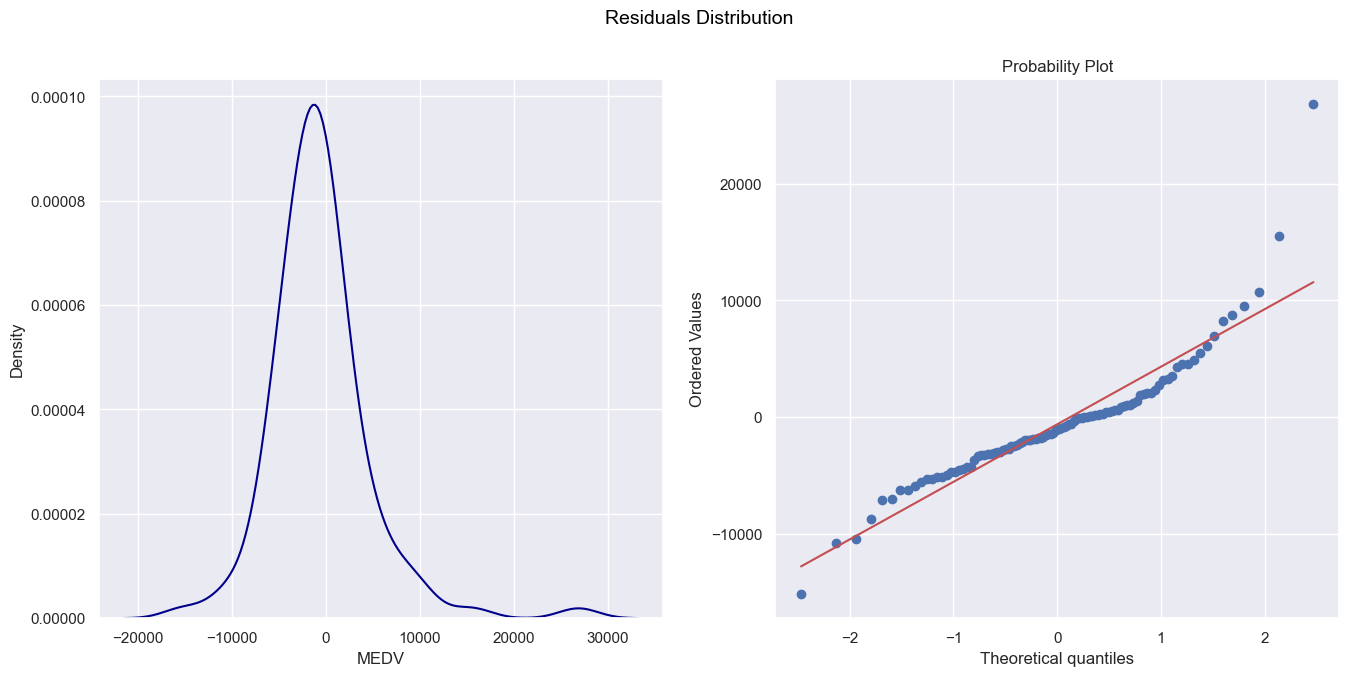

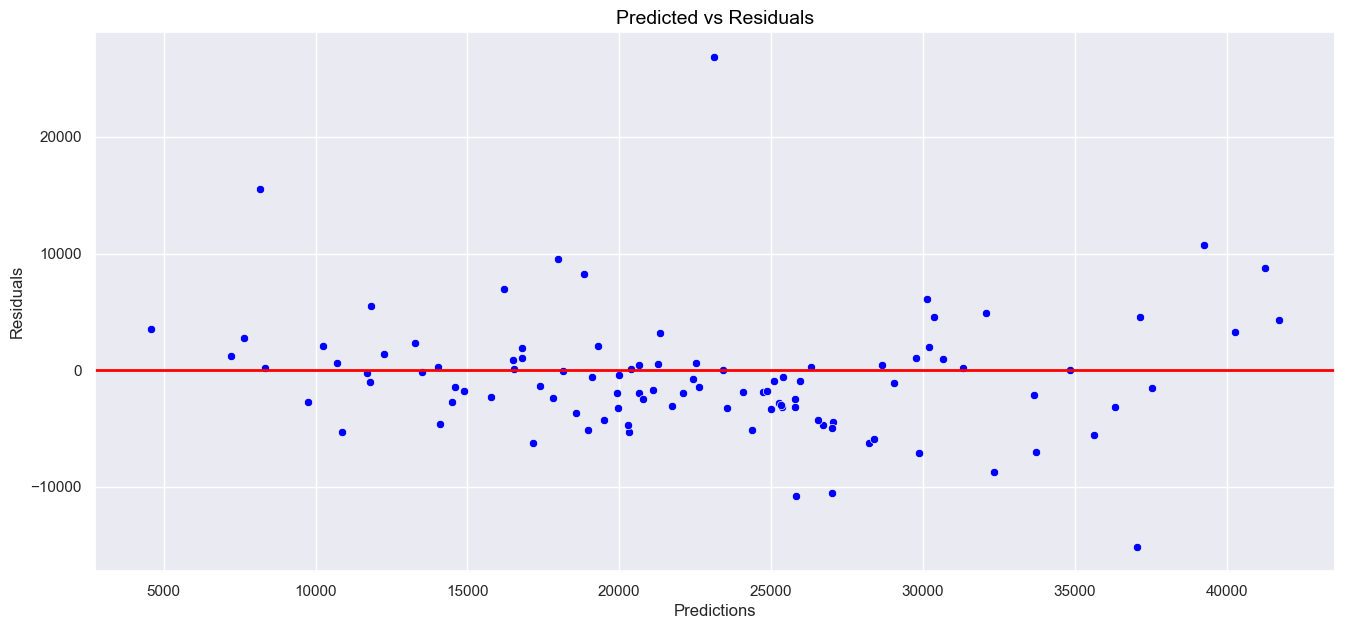

In [51]:
lr_model, lr_metrics = regression_model(LinearRegression(), X_sc, y)

## Linear Regression (Log Transformation)

					Model : LinearRegression()

r2 Score

r2_score_train : 0.753
r2_score_test : 0.745
Variance : 0.8%
Adjusted_r2_score_train : 0.748
Adjusted_r2_score_test : 0.72

Model Measurements (Metrics)

MSE : 0.05
RMSE : 0.22
MAE : 0.14



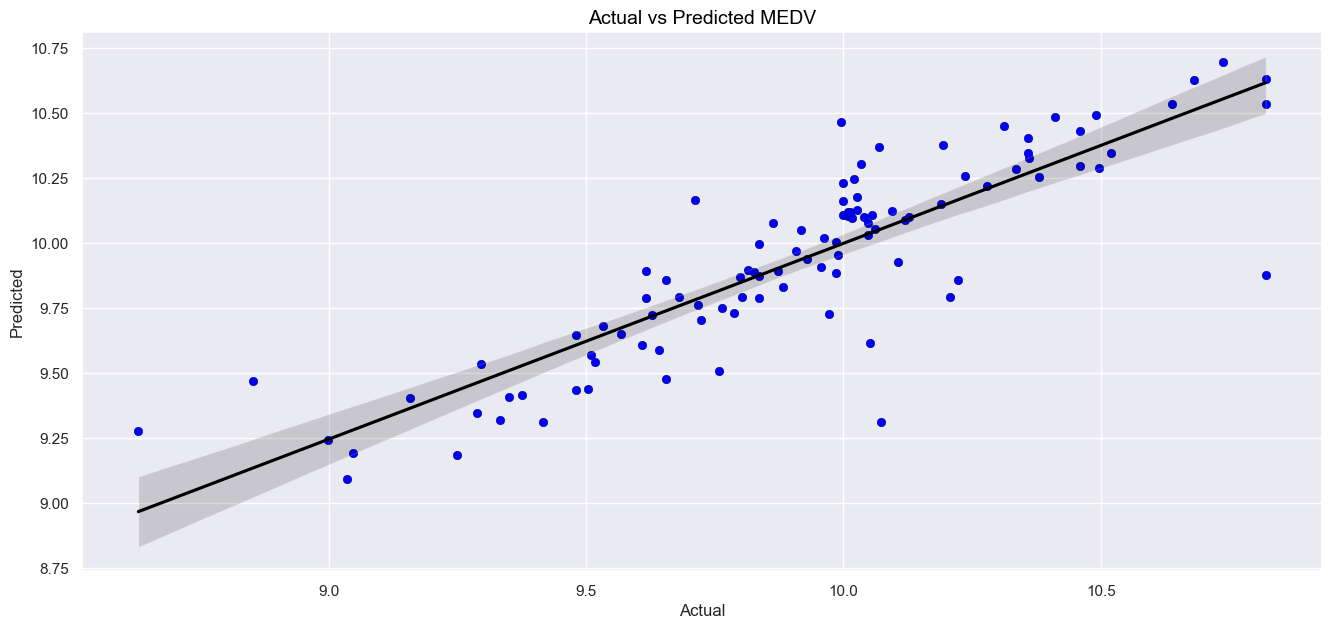

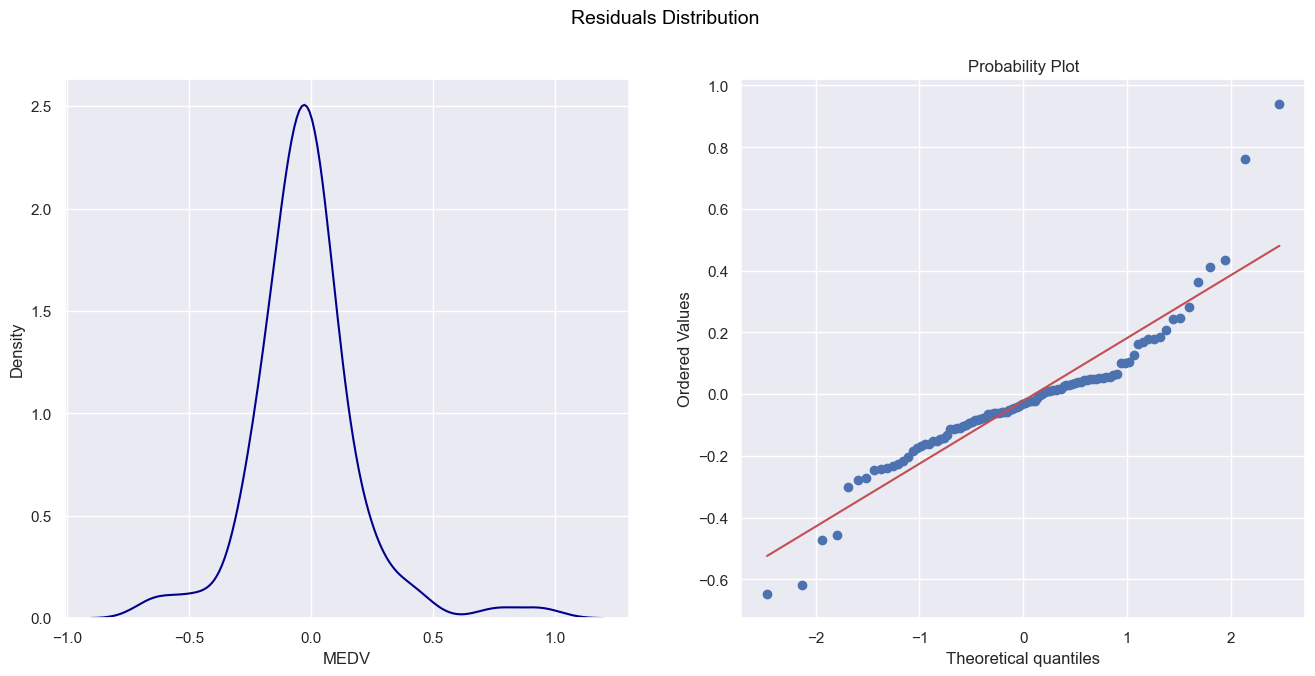

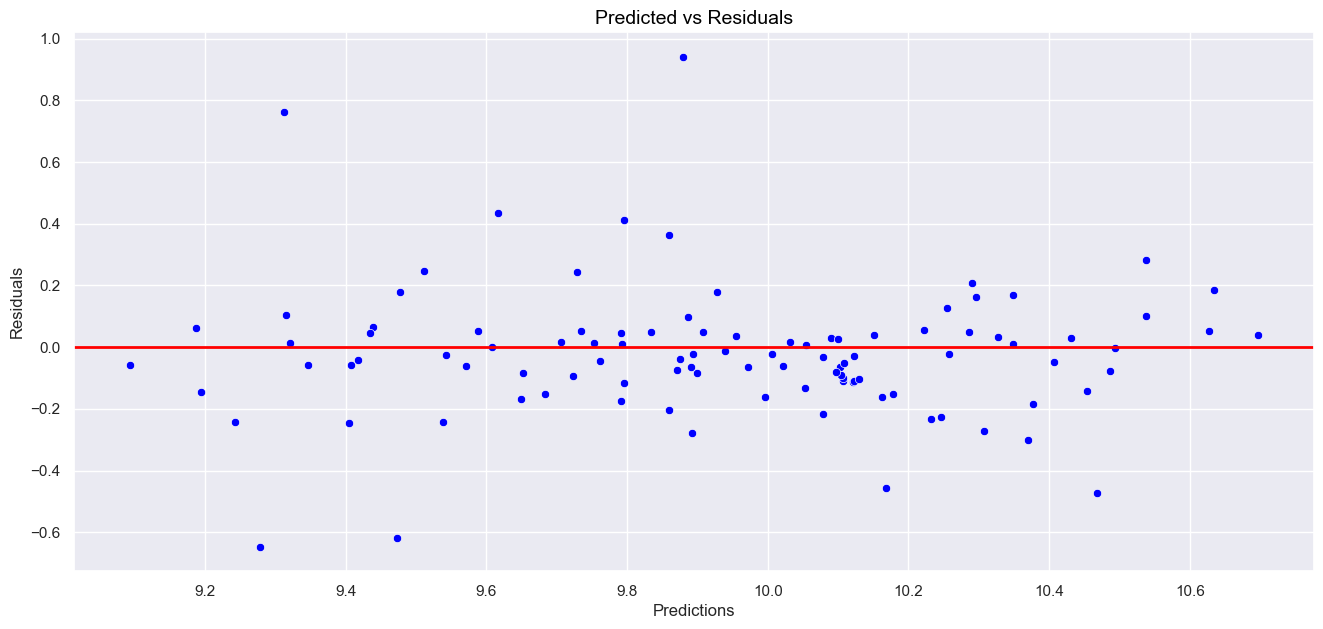

In [52]:
lr_log_model, lr_log_metrics = regression_model(LinearRegression(), X_sc, y_log)

## OLS Method

In [53]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2, random_state = 11)
lr.fit(X_train, y_train)

reg_model = smf.OLS(endog = y_train, exog = X_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.515e+04
Date:                Sat, 26 Aug 2023   Prob (F-statistic):                        0.00
Time:                        20:01:39   Log-Likelihood:                         -320.71
No. Observations:                 404   AIC:                                      659.4
Df Residuals:                     395   BIC:                                      695.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0961      0.012     -8.005      0.000      -0.120      -0.072
ZN             0.0051      0.003      1.492      0.137      -0.002       0.012
INDUS          0.0285      0.006      4.505      0.000       0.016       0.041
RM             1.0383      0.035     29.467      0.000       0.969       1.108
AGE            0.0027      0.002      1.597      0.111      -0.001       0.006
DIS            0.0752      0.024      3.091      0.002       0.027       0.123
PTRATIO        0.1318      0.013      9.998      0.000       0.106       0.158
LSTAT          0.0246      0.006      3.887      0.000       0.012       0.037
CHAS_0         0.0689      0.109      0.633      0.527      -0.145       0.283
==============================================================================
Omnibus:                       27.497   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.861
Skew:                           0.438   Prob(JB):                     4.05e-11
Kurtosis:                       4.440   Cond. No.                         315.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear / OLS Assumptions

<b> A1 - Linearity </b>

* Actual and Predicted Prices are linearly related.

<b> A2 - No Multicollinearity </b>

* All the independent features have VIF < 5, which indicates the absence of multicollinearity among them.

<b> A3 - Normality </b>

* Residuals are normally distributed.

<b> A4 - Homoscedasticity </b>

* There is equal variance of residuals.

<b> A5 - No Autocorrelation </b>

* The Durbin-Watson statistic value is 2.007, which is nearly equal to 2, suggesting the absence of autocorrelation.

## Lasso Regression (L1 Regularization) 

					Model : Lasso(alpha=0.001)

r2 Score

r2_score_train : 0.753
r2_score_test : 0.745
Variance : 0.8%
Adjusted_r2_score_train : 0.748
Adjusted_r2_score_test : 0.721

Model Measurements (Metrics)

MSE : 0.05
RMSE : 0.22
MAE : 0.14



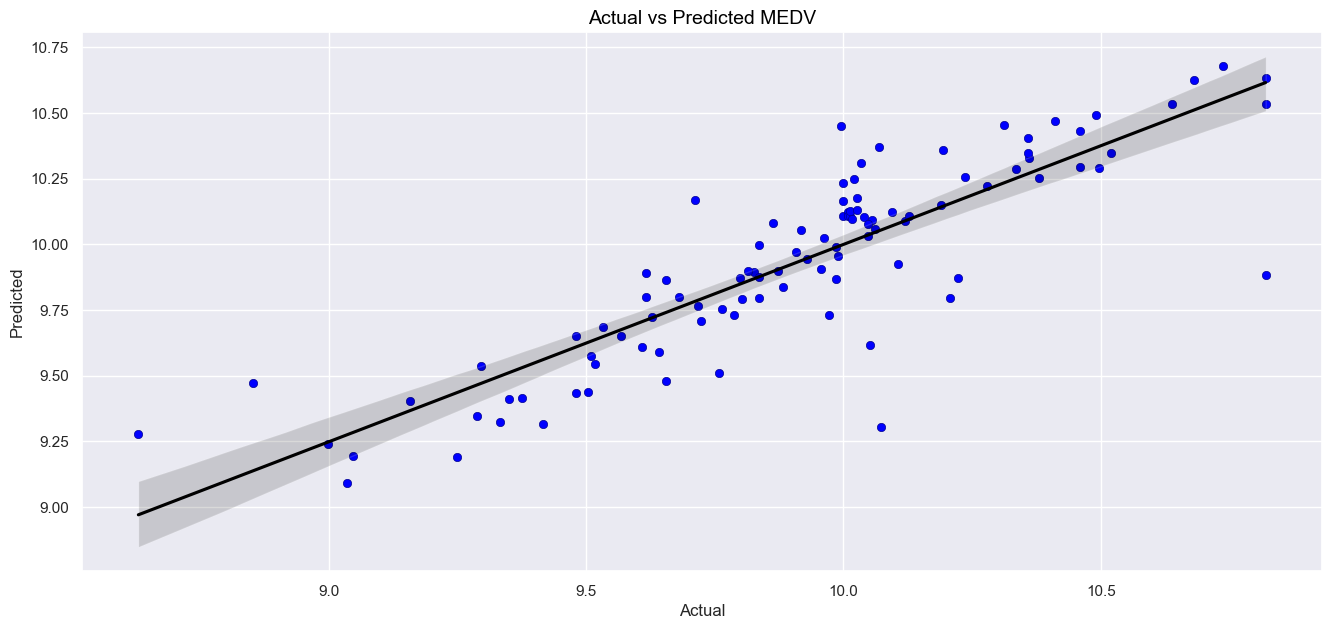

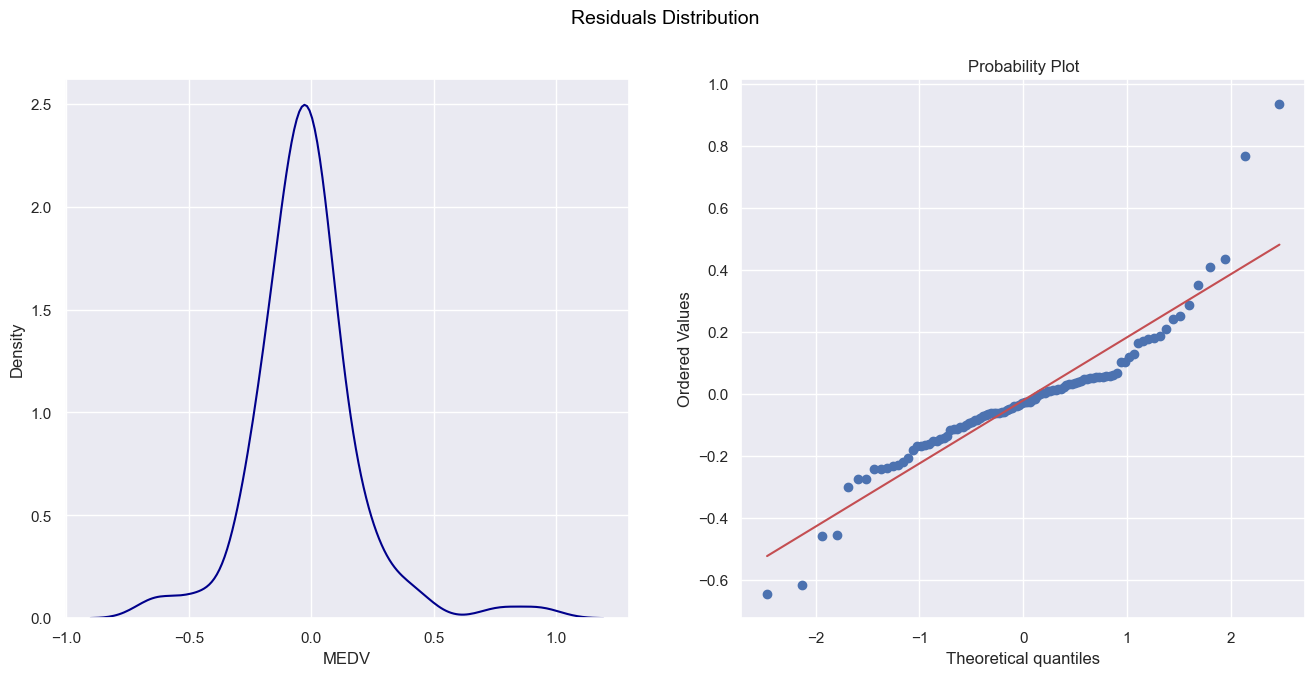

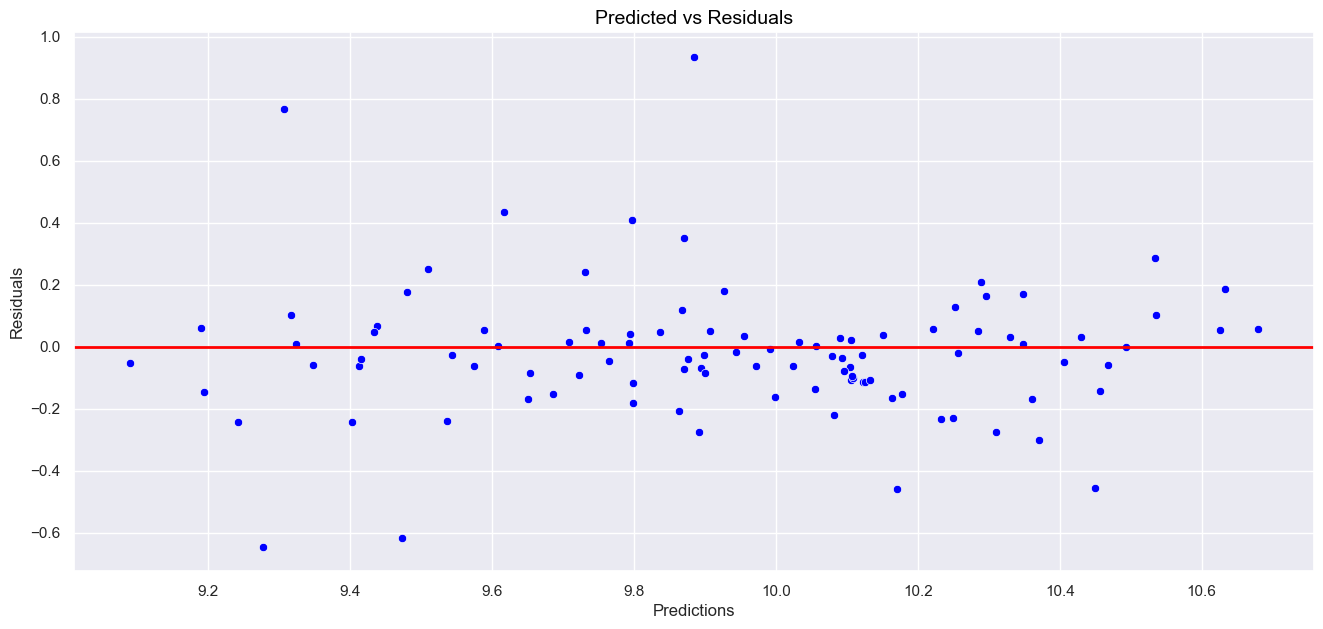

In [54]:
# param_grid = {"alpha" : [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]}

# grid_model = GridSearchCV(estimator = Lasso(), param_grid = param_grid, scoring = "neg_mean_squared_error").fit(X_train, y_train)

# print(grid_model.best_params_)

lasso_model, lasso_metrics = regression_model(Lasso(alpha = 0.001), X, y_log)

## Ridge Regression (L2 Regularization) 

					Model : Ridge(alpha=1)

r2 Score

r2_score_train : 0.753
r2_score_test : 0.745
Variance : 0.8%
Adjusted_r2_score_train : 0.748
Adjusted_r2_score_test : 0.72

Model Measurements (Metrics)

MSE : 0.05
RMSE : 0.22
MAE : 0.14



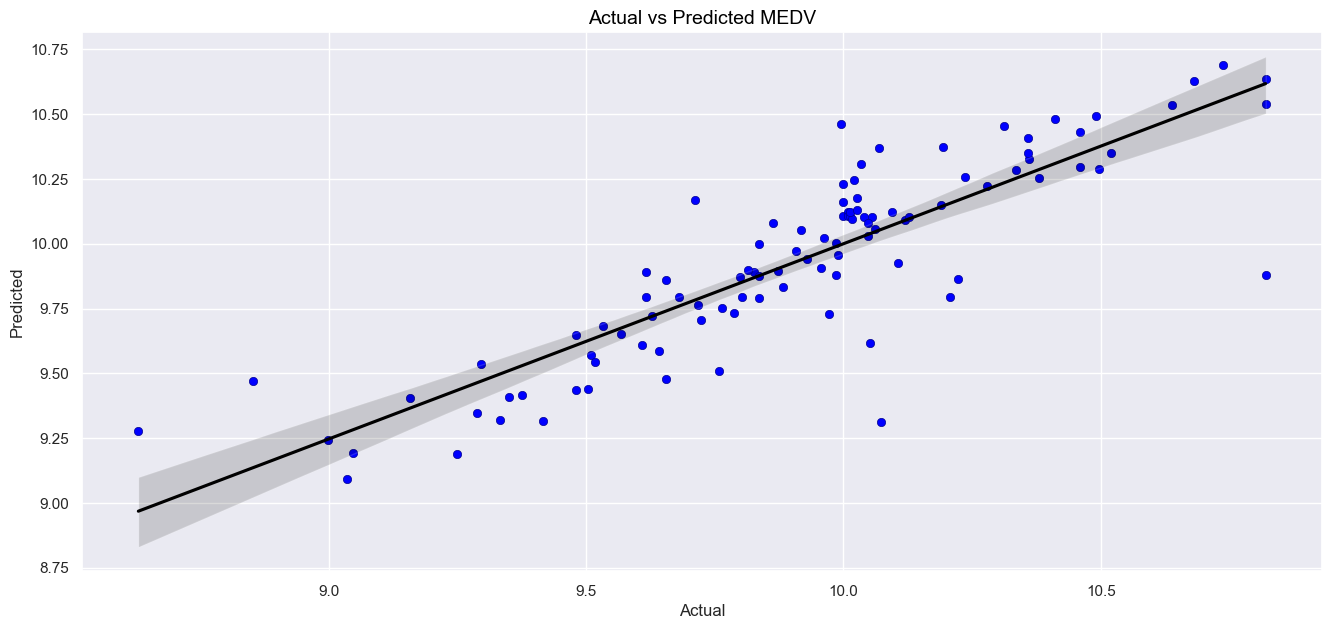

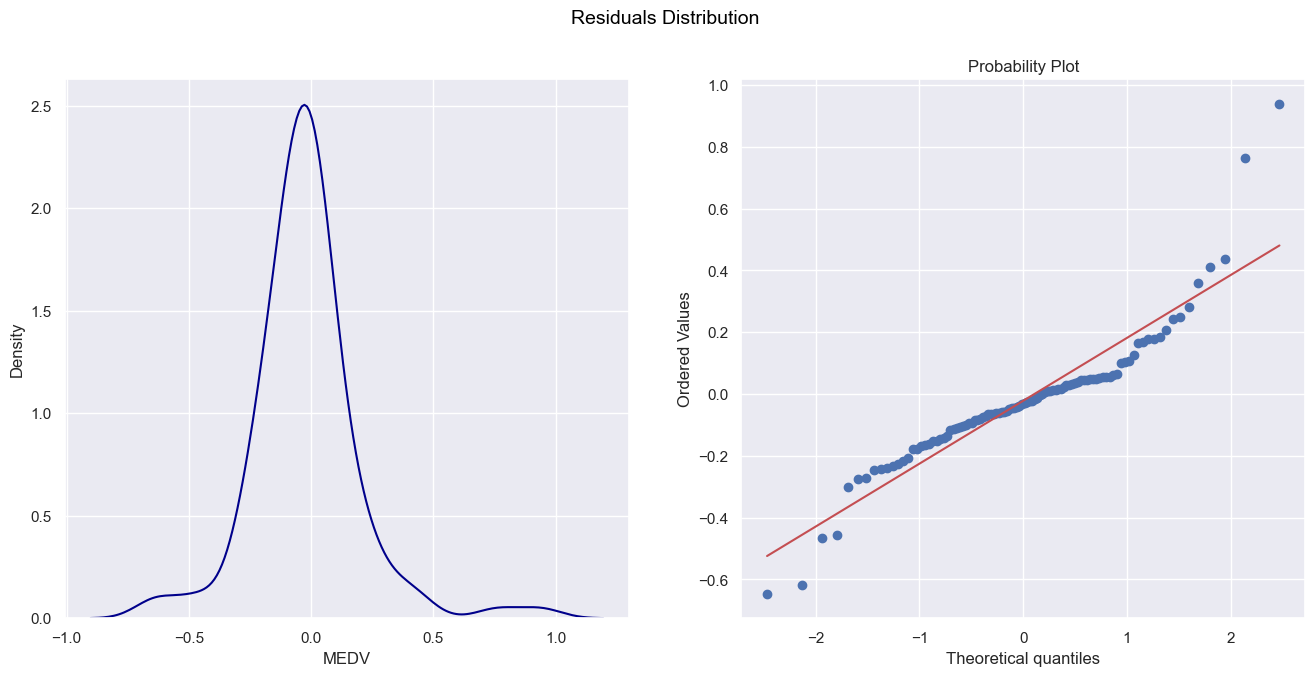

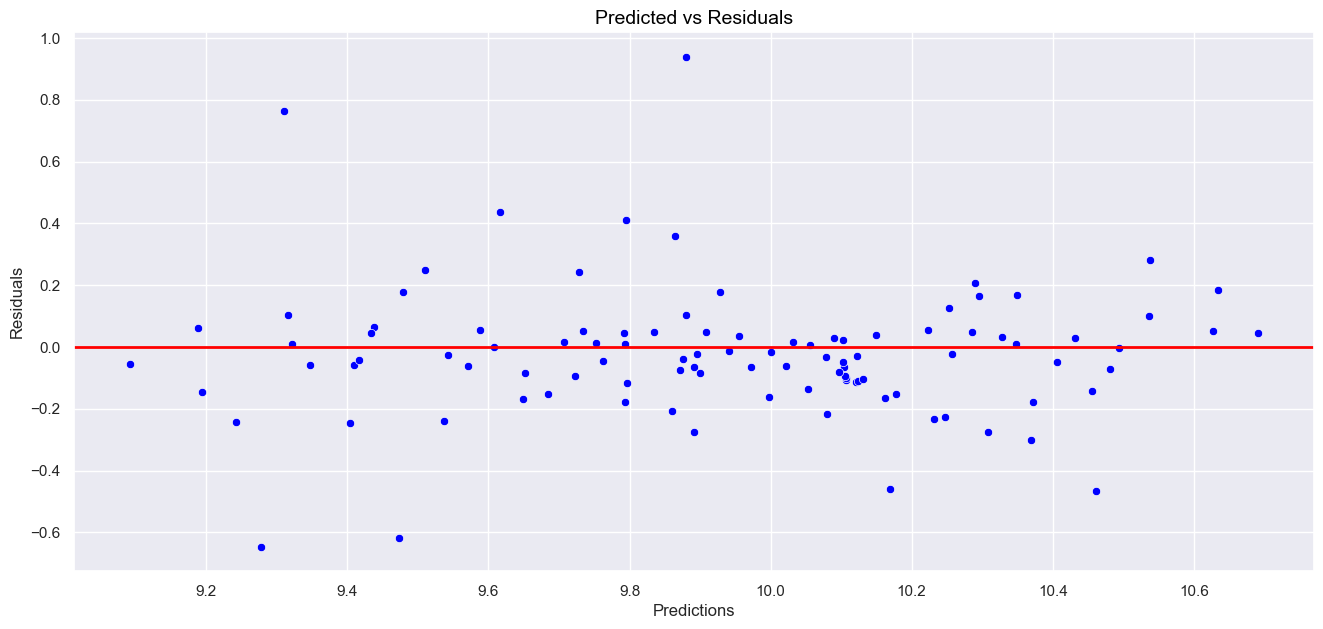

In [55]:
# param_grid = {"alpha" : [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]}

# grid_model = GridSearchCV(Ridge(), param_grid, scoring = "neg_mean_squared_error").fit(X_train, y_train)

# print(grid_model.best_params_)

ridge_model, ridge_metrics = regression_model(Ridge(1), X, y_log)

## ElasticNet

					Model : ElasticNet(alpha=0.001, l1_ratio=0.1)

r2 Score

r2_score_train : 0.753
r2_score_test : 0.745
Variance : 0.8%
Adjusted_r2_score_train : 0.748
Adjusted_r2_score_test : 0.72

Model Measurements (Metrics)

MSE : 0.05
RMSE : 0.22
MAE : 0.14



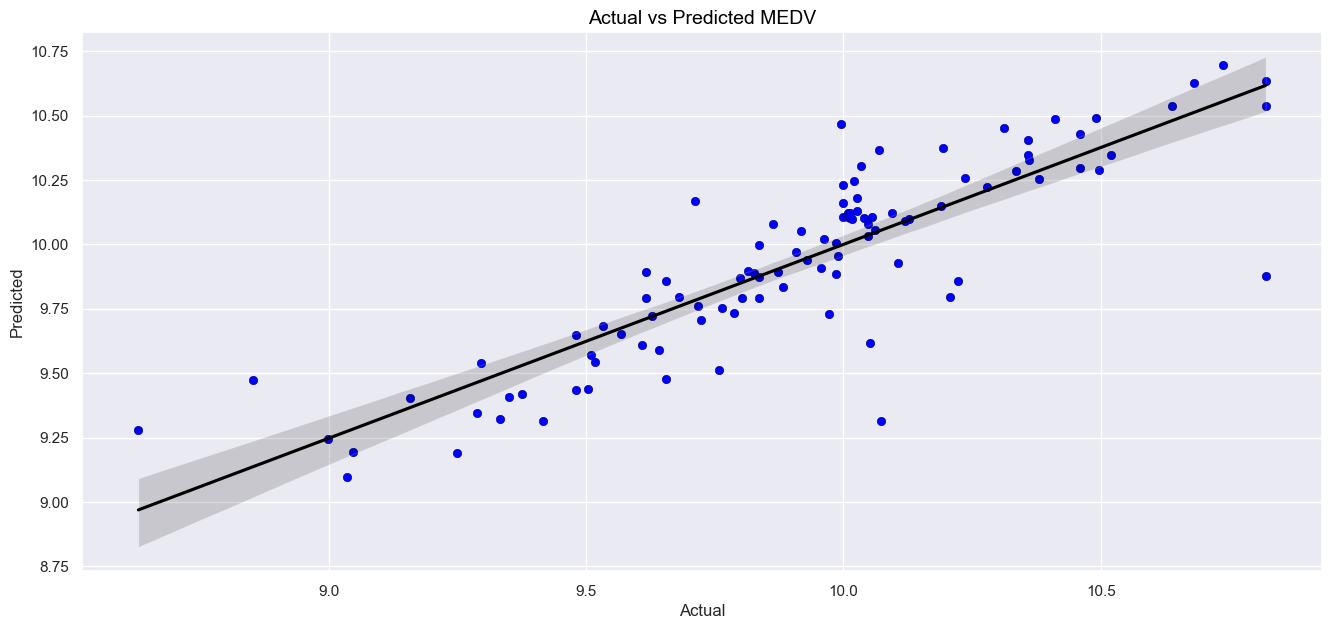

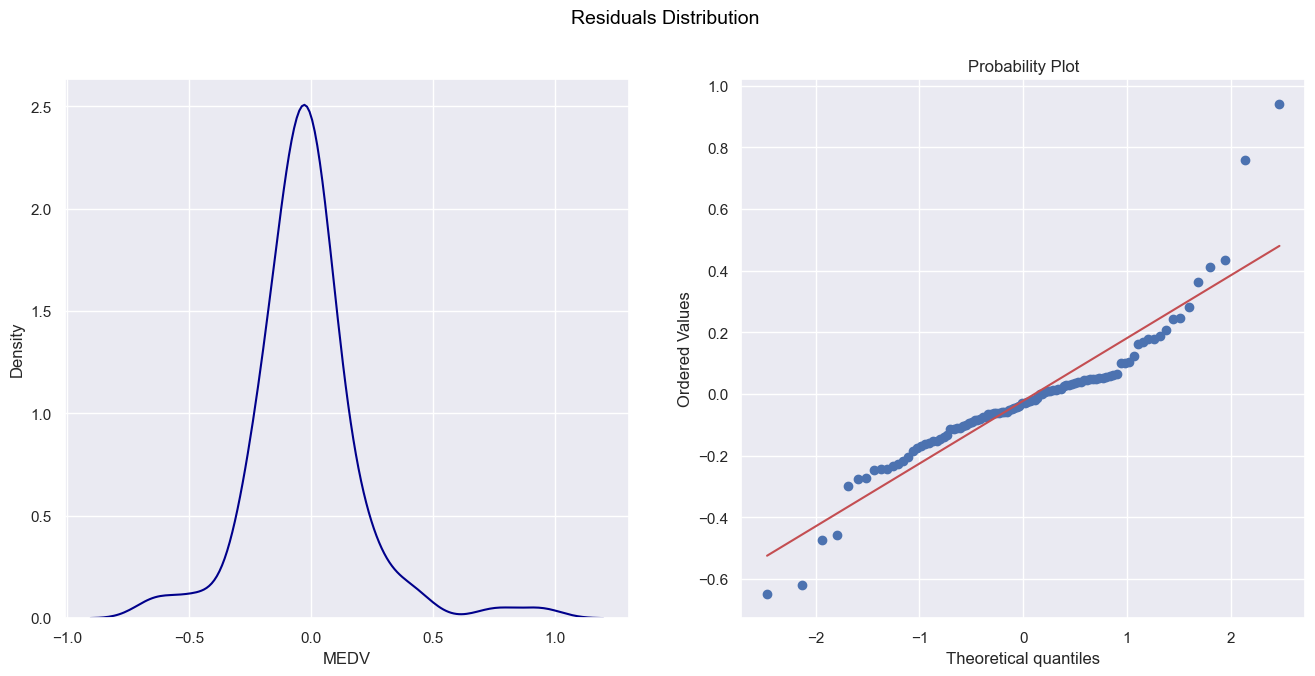

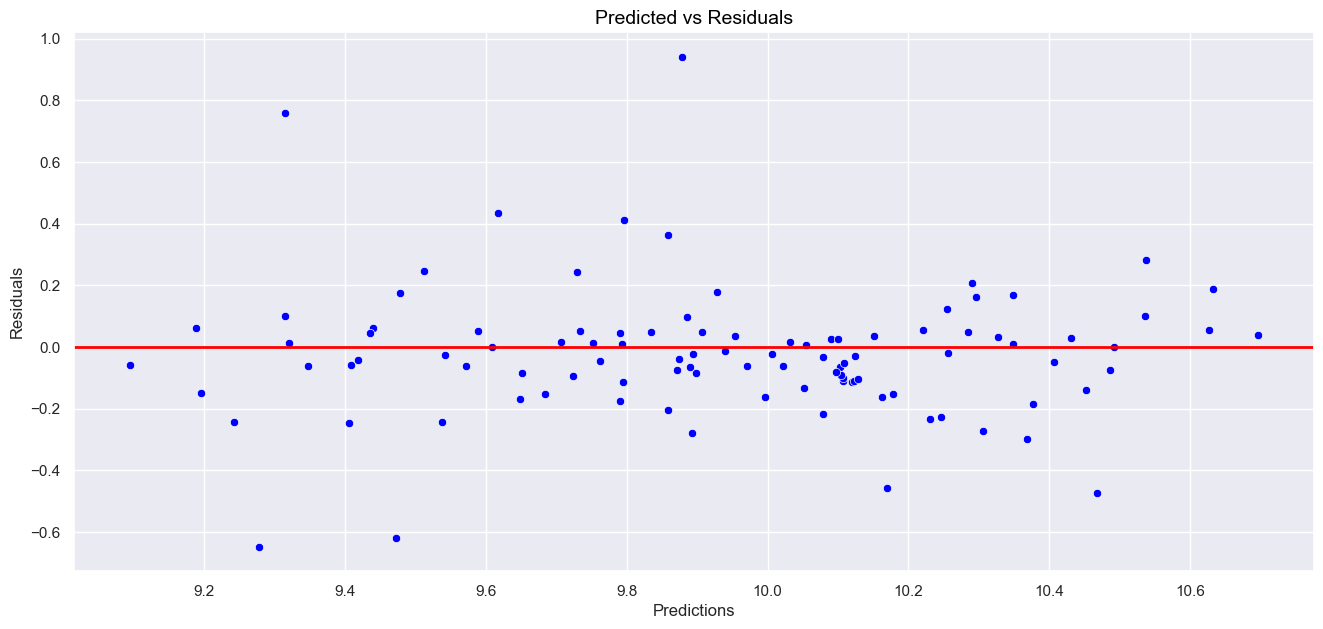

In [56]:
# param_grid = {"l1_ratio" : [.1, .5, .7, .9, .50, .95, .97, .99, 1],
#               "alpha" : [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10],
#               "max_iter" : [1000]}

# grid_model = GridSearchCV(ElasticNet(), param_grid, scoring = "neg_mean_squared_error").fit(X_train, y_train)

# print(grid_model.best_params_)

elnt_model, elnt_metrics = regression_model(ElasticNet(alpha = 0.001, l1_ratio = 0.1, max_iter = 1000), X_sc, y_log)

## Decision Tree Regressor 

					Model : DecisionTreeRegressor(max_depth=15, max_features='auto', min_samples_leaf=5,
                      min_samples_split=30)

r2 Score

r2_score_train : 0.856
r2_score_test : 0.72
Variance : 13.6%
Adjusted_r2_score_train : 0.853
Adjusted_r2_score_test : 0.692

Model Measurements (Metrics)

MSE : 0.05
RMSE : 0.22
MAE : 0.15



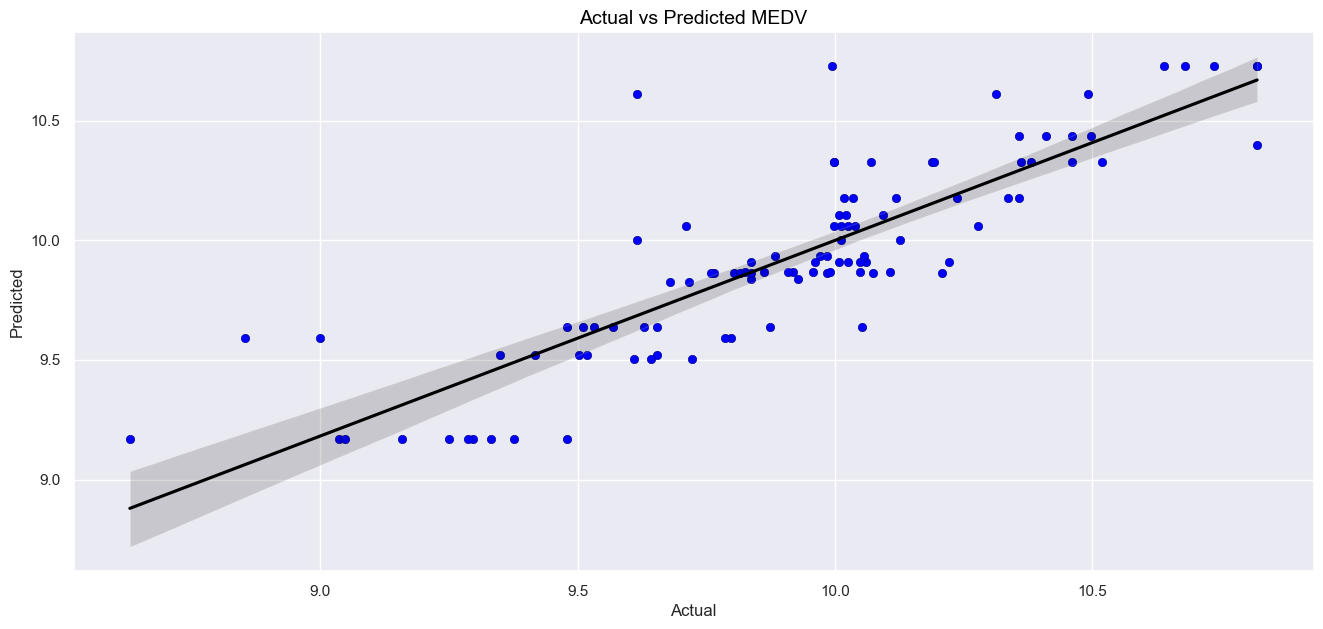

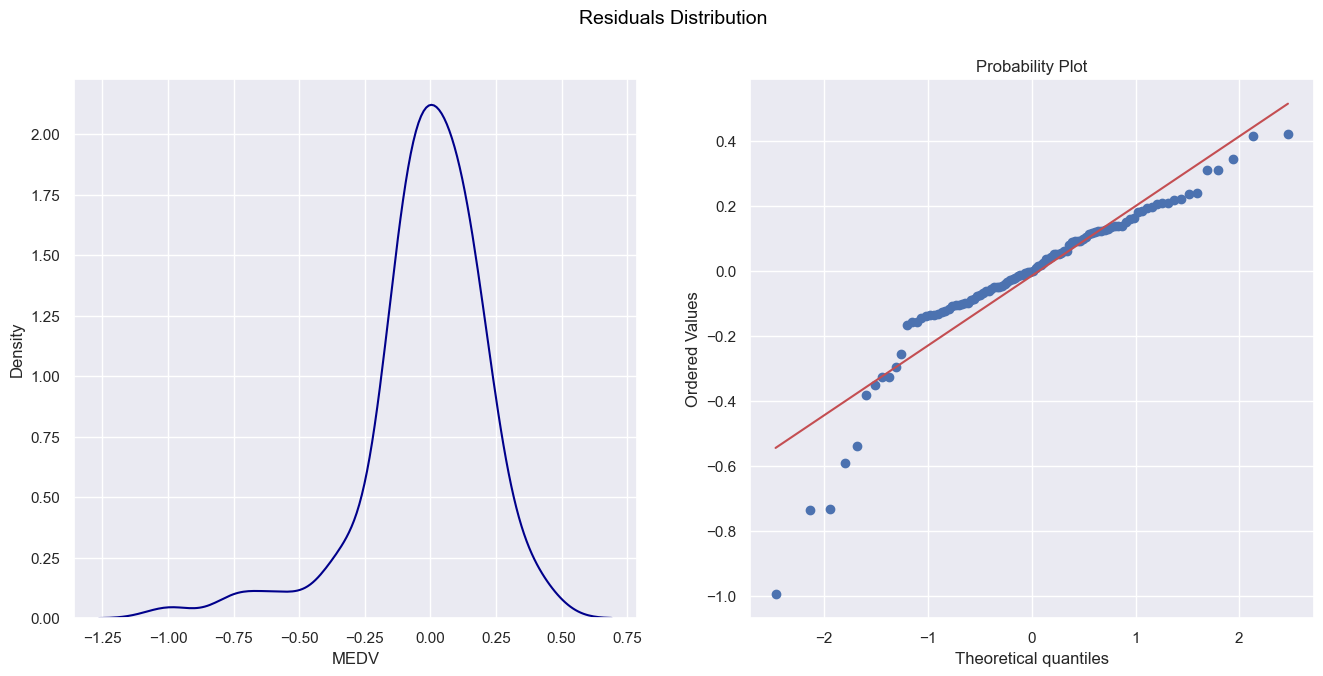

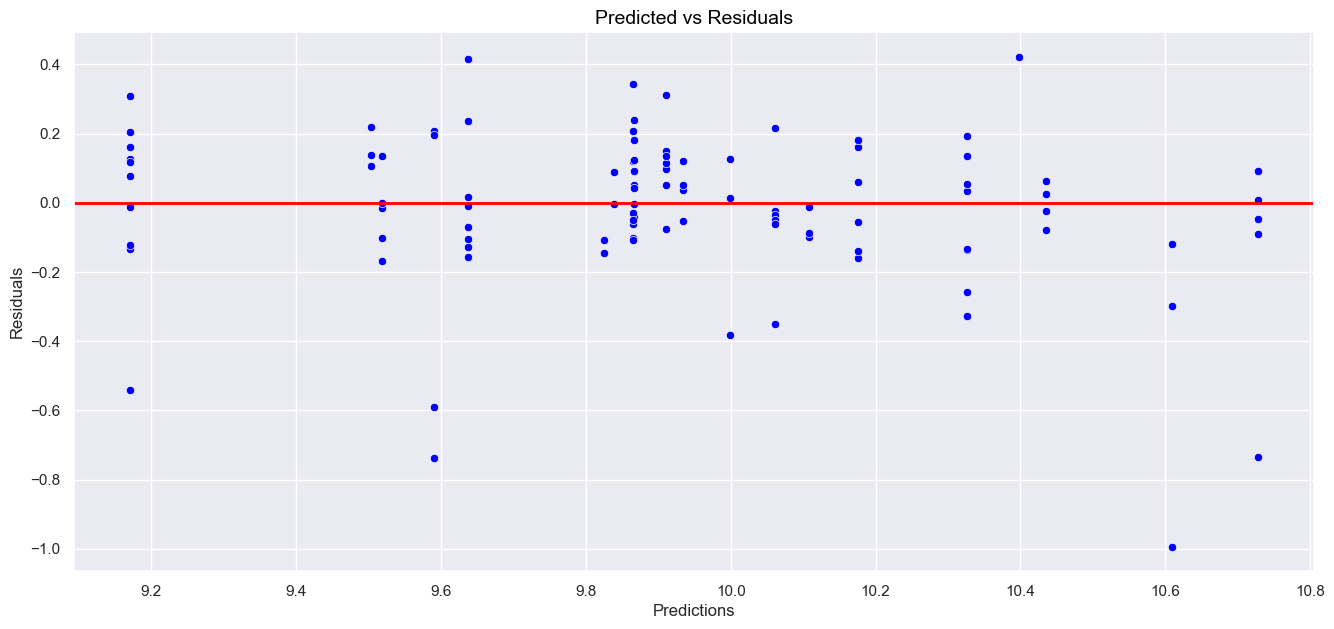

In [57]:
# param_grid = {
#     "max_depth" : [None, 1, 2, 3, 4, 5, 10, 15],
#     "min_samples_split" : [2, 5, 10, 20, 30],
#     "min_samples_leaf" : [1, 2, 3, 4, 5],
#     "max_features" : ['auto', 'sqrt', 'log2']
# }

# grid_model = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring = "neg_mean_squared_error").fit(X_train, y_train)

# print(grid_model.best_params_)

dt_model, dt_metrics = regression_model(DecisionTreeRegressor(max_depth = 15, max_features = "auto", min_samples_leaf = 5, min_samples_split = 30), X, y_log)

## Random Forest Regressor

					Model : RandomForestRegressor(max_depth=10, max_features='sqrt')

r2 Score

r2_score_train : 0.969
r2_score_test : 0.792
Variance : 17.7%
Adjusted_r2_score_train : 0.968
Adjusted_r2_score_test : 0.772

Model Measurements (Metrics)

MSE : 0.04
RMSE : 0.2
MAE : 0.13



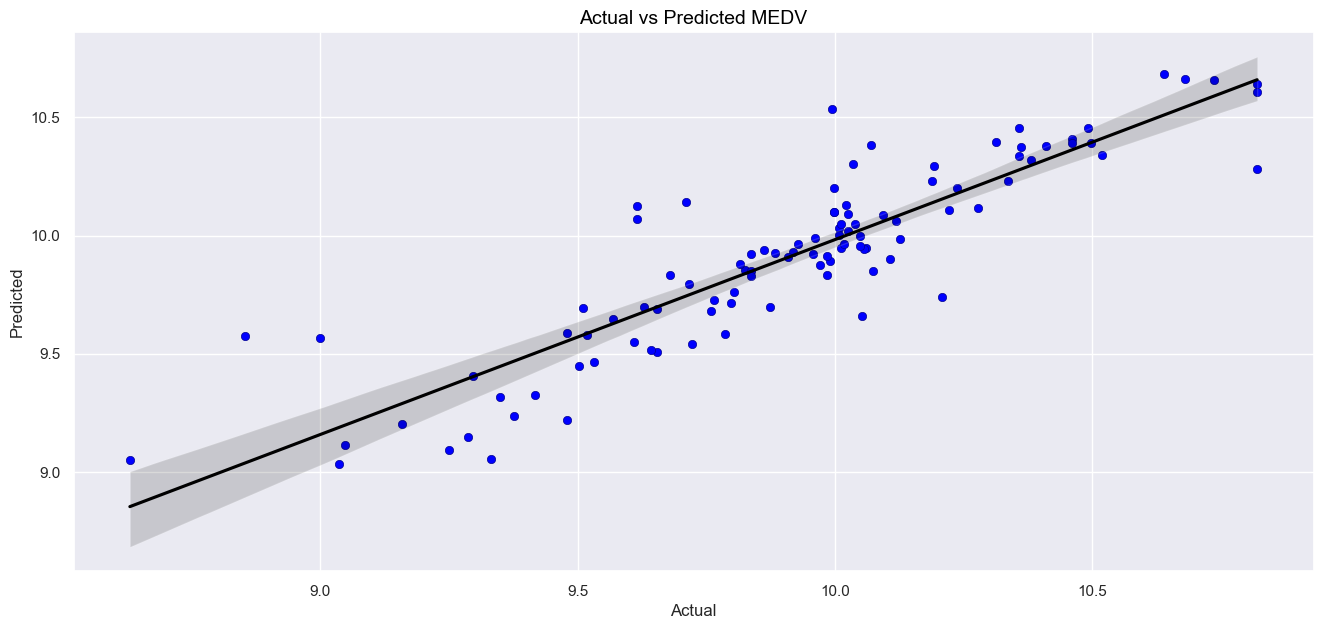

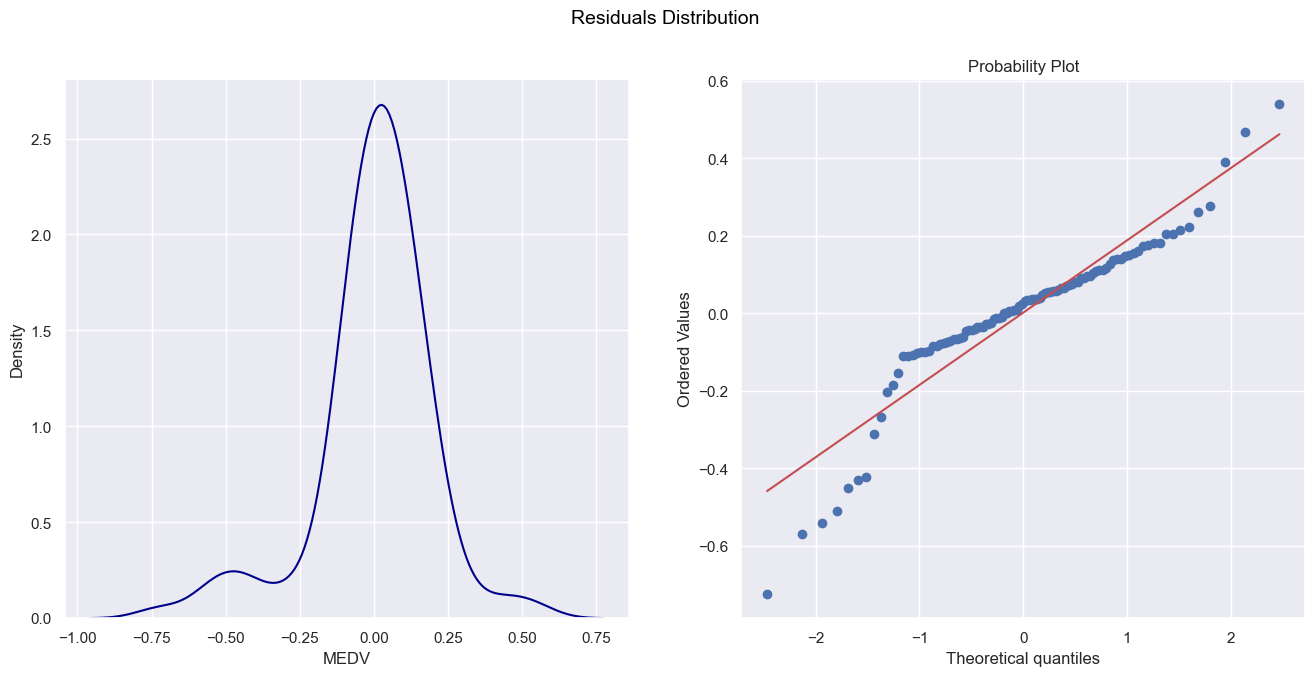

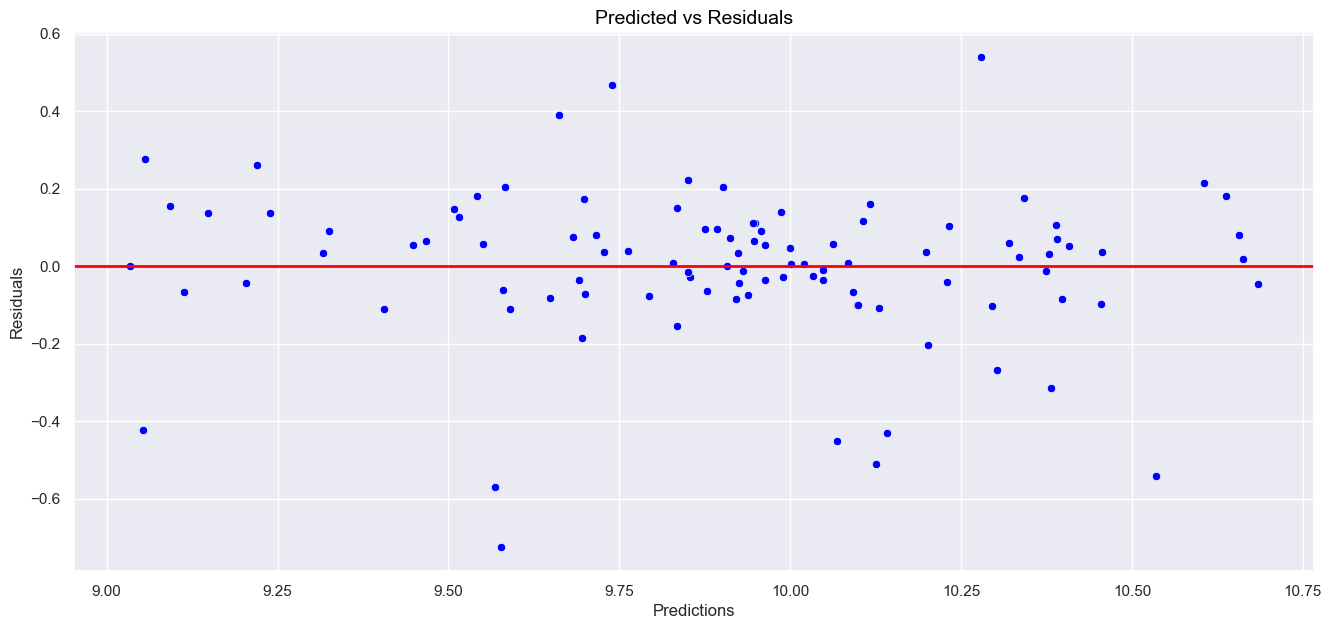

In [58]:
# param_grid = {"max_depth" : [2, 3, 4, 10],
#               "bootstrap" : [True, False],
#               "max_features" : ['auto', 'sqrt', 'log2', None],
#               "min_samples_leaf" : [1, 2, 4],
#               "min_samples_split" : [2, 5, 10],
#               "n_estimators" : [10, 50, 100, 150, 200]
#               }

# grid_model = GridSearchCV(RandomForestRegressor(), param_grid, scoring = "r2").fit(X_train, y_train)

# print(grid_model.best_params_)

rf_model, rf_metrics = regression_model(RandomForestRegressor(bootstrap = True, max_depth = 10, max_features = "sqrt", min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100), X_sc, y_log)

## Support Vector Regressor

					Model : SVR()

r2 Score

r2_score_train : 0.879
r2_score_test : 0.773
Variance : 10.6%
Adjusted_r2_score_train : 0.876
Adjusted_r2_score_test : 0.751

Model Measurements (Metrics)

MSE : 0.04
RMSE : 0.2
MAE : 0.13



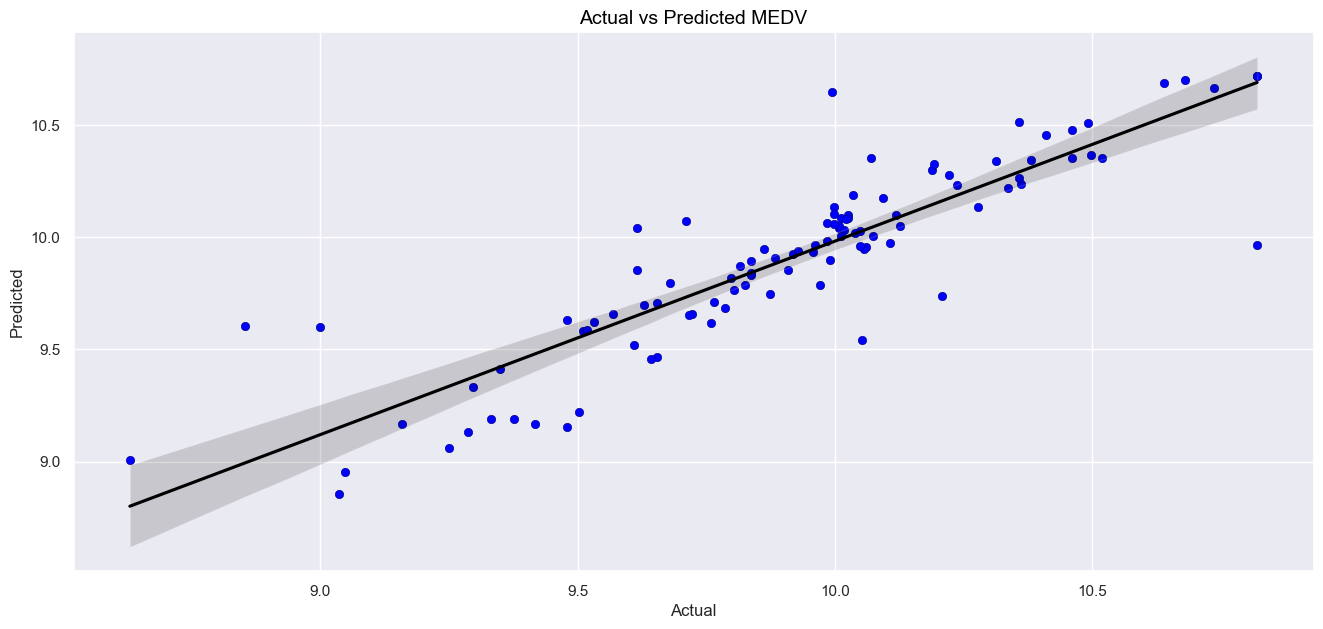

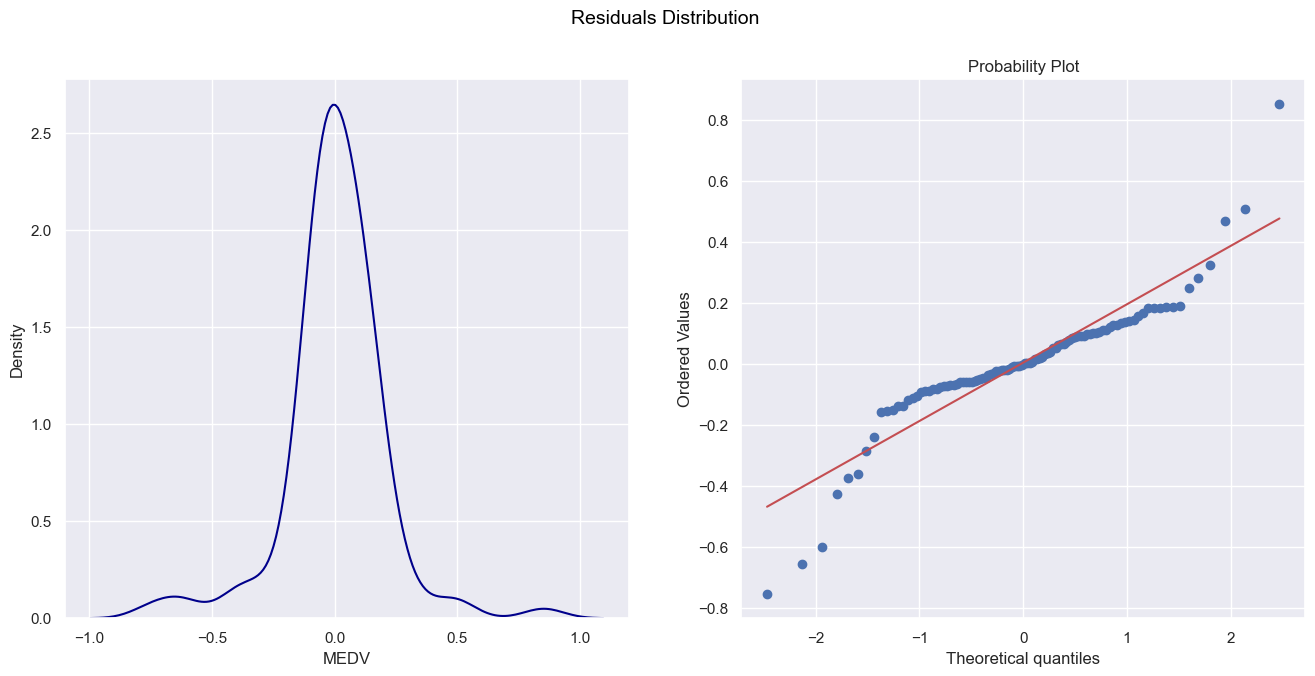

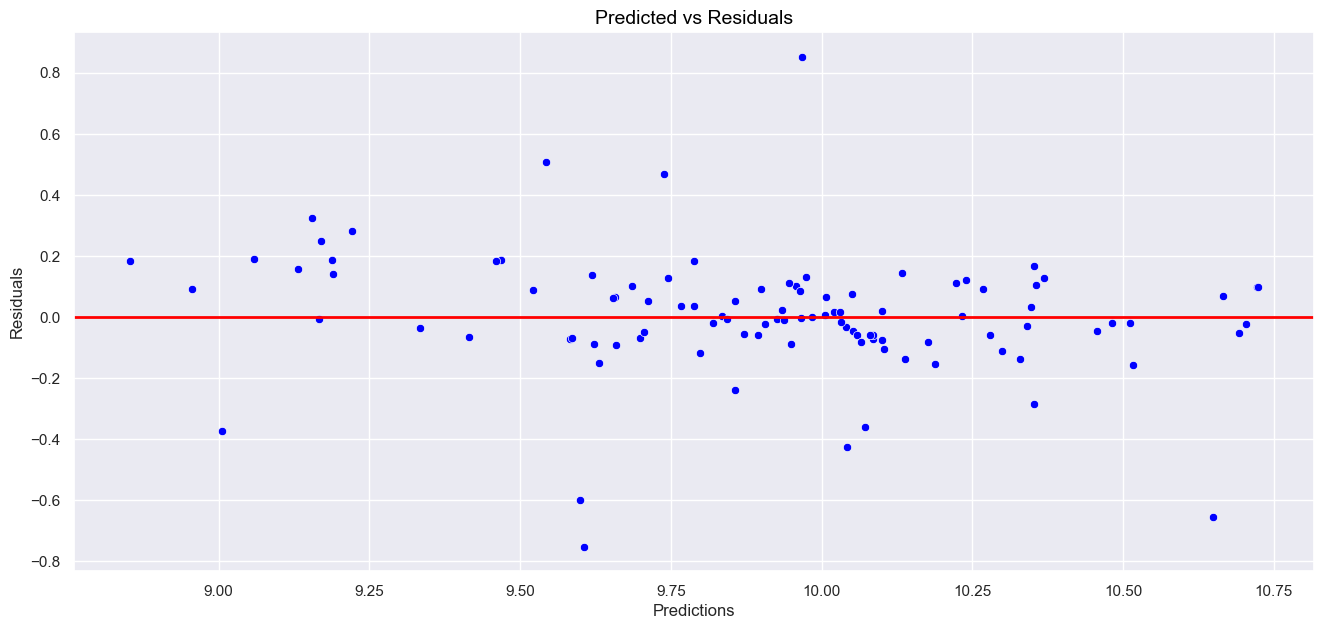

In [59]:
svr_model, svr_metrics = regression_model(SVR(), X_sc, y_log)

## XGB Regressor 

					Model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

r2 Score

r2_score_train : 1.0
r2_score_test : 0.764
Variance : 23.6%
Adjusted_r2_score_train : 1.0
Adjusted_r2_score_test : 0.741

Model Measurements (Metrics)

MSE : 0.04
RMSE : 0.2
MAE : 0.16



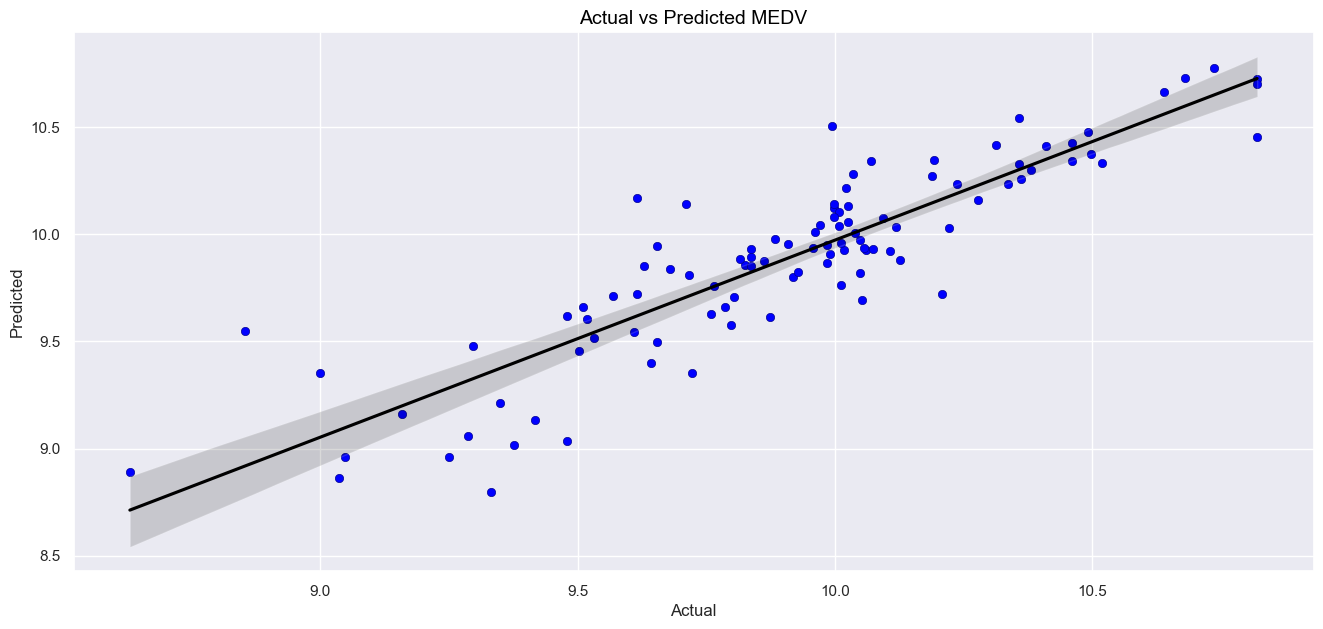

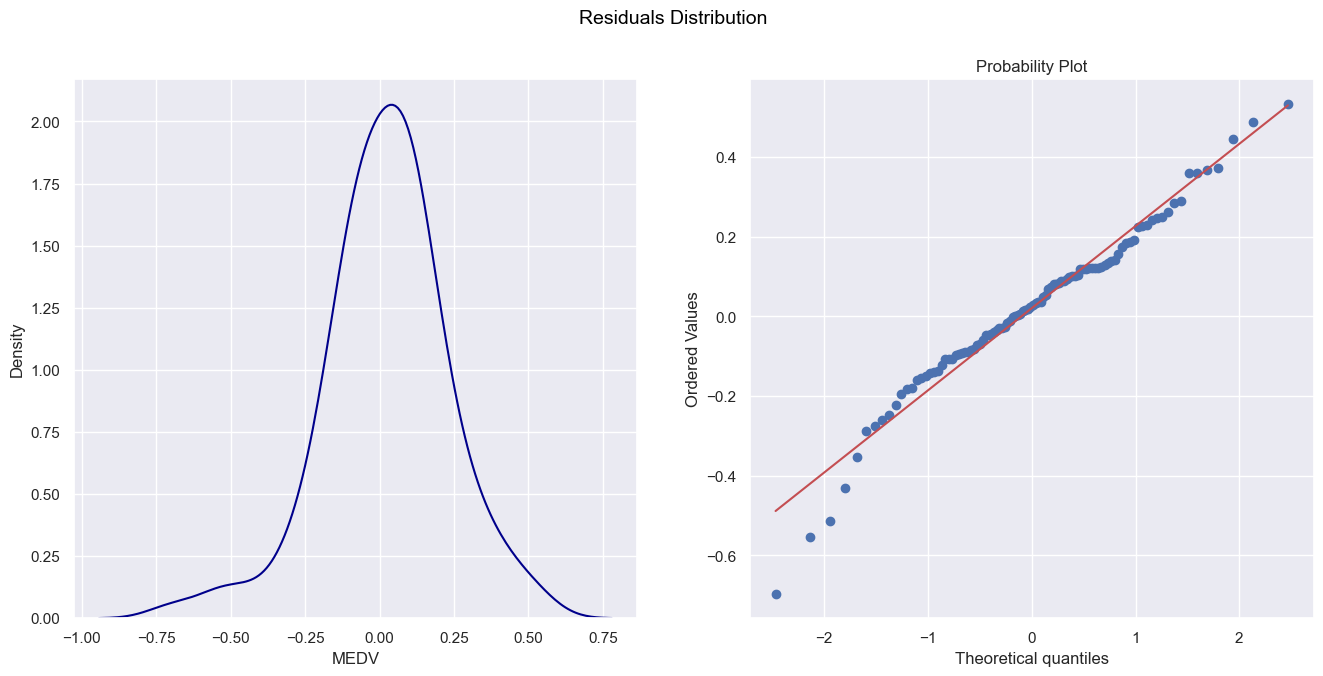

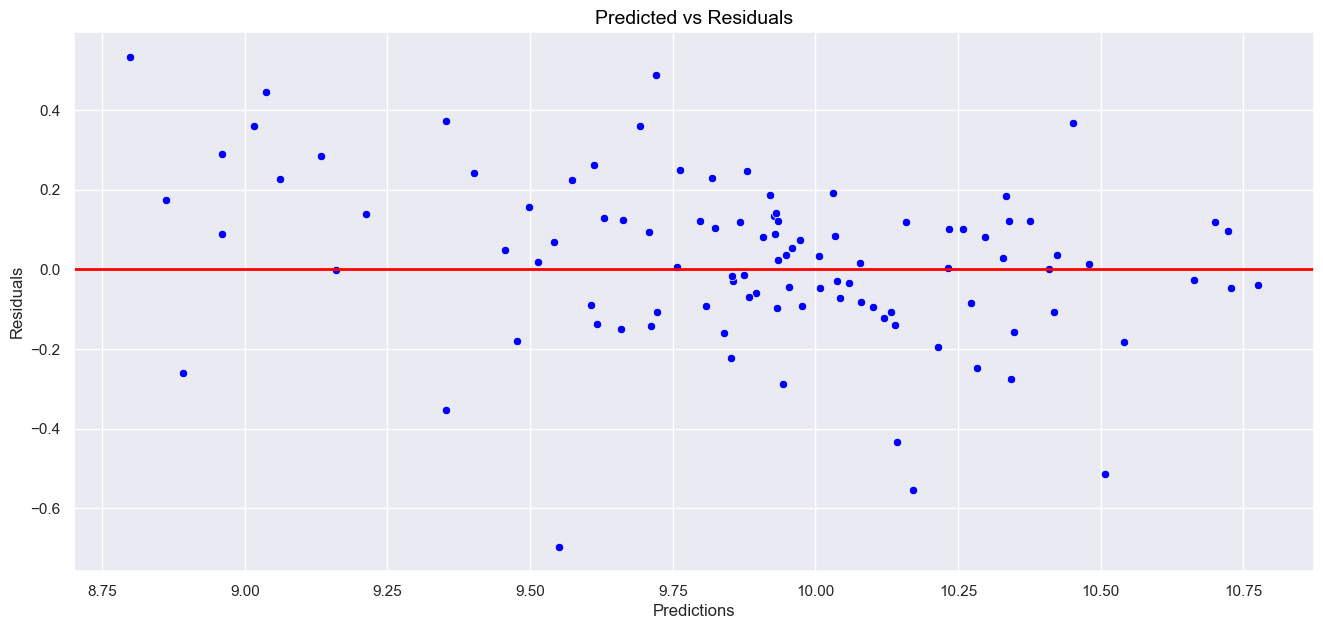

In [60]:
xgb_model, xgb_metrics = regression_model(XGBRegressor(), X_sc, y_log)

# Final Results

In [61]:
pd.DataFrame(
    [lr_log_metrics, lasso_metrics, ridge_metrics, elnt_metrics, dt_metrics, rf_metrics, svr_metrics, xgb_metrics],
    columns = ["r2_score (Train)", "r2_score (Test)", "Adj_r2 (Train)", "Adj_r2 (Test)", "Variance", "MSE", "RMSE", "MAE"],
    index = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression", "XGB Regressor"]
)

,r2_score (Train),r2_score (Test),Adj_r2 (Train),Adj_r2 (Test),Variance,MSE,RMSE,MAE
Linear Regression,0.753,0.745,0.748,0.720,0.8%,0.05,0.22,0.14
Lasso Regression,0.753,0.745,0.748,0.721,0.8%,0.05,0.22,0.14
Ridge Regression,0.753,0.745,0.748,0.720,0.8%,0.05,0.22,0.14
Elastic Net,0.753,0.745,0.748,0.720,0.8%,0.05,0.22,0.14
Decision Tree Regression,0.856,0.720,0.853,0.692,13.6%,0.05,0.22,0.15
Random Forest Regression,0.969,0.792,0.968,0.772,17.7%,0.04,0.20,0.13
Support Vector Regression,0.879,0.773,0.876,0.751,10.6%,0.04,0.20,0.13
XGB Regressor,1.000,0.764,1.000,0.741,23.6%,0.04,0.20,0.16
